In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cosine
sns.set_style("darkgrid")
sns.set_palette("colorblind")
from pymilvus import Collection, connections
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.random_projection import johnson_lindenstrauss_min_dim, SparseRandomProjection

from squrrl.vector.load_milvus import *
from tqdm import tqdm, trange
import umap 

connections.connect("default", host="127.0.0.1", port="19530")
collection = Collection("open_library")    
collection.load()


/home/jrings/mambaforge/envs/squrrl/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from sentence_transformers import SentenceTransformer
import json
from tqdm import tqdm 

def load_authors() -> dict:
    authors = {}
    with open("/home/jrings/data/openlibrary/author_key.txt", "r") as _in:
        for line in _in:
            pp = line[1:-1].split(",")
            authors[pp[0]] = ",".join(pp[1:]).strip()
    return authors


author_names = load_authors()



In [3]:
config = toml.load("config_local.toml")
authors, books = load_data(config)
model = SentenceTransformer(
        config.get("base", {}).get("transformer_model", "paraphrase-MiniLM-L3-v2"), 
        device="cuda")

17:37:34 load_milvus:load_data:79 | Loading data
17:37:34 load_milvus:load_authors:25 | Reading authors file


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12497815/12497815 [00:17<00:00, 724977.09it/s]


17:38:06 load_milvus:load_data:81 | Reading works file


  0%|▎                                                                                                                                               | 6776/2727518 [00:00<04:56, 9170.87it/s]

17:38:09 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2604010A


  0%|▌                                                                                                                                             | 10998/2727518 [00:01<03:15, 13915.75it/s]

17:38:09 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


  1%|█▎                                                                                                                                            | 26386/2727518 [00:01<02:09, 20829.02it/s]

17:38:10 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


  1%|█▌                                                                                                                                            | 30862/2727518 [00:02<02:04, 21575.97it/s]

17:38:10 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A
17:38:10 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


  2%|██▏                                                                                                                                           | 41887/2727518 [00:02<02:03, 21784.36it/s]

17:38:11 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


  2%|██▍                                                                                                                                           | 46285/2727518 [00:02<02:05, 21390.58it/s]

17:38:11 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


  2%|██▋                                                                                                                                           | 52791/2727518 [00:03<02:07, 21010.87it/s]

17:38:11 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A
17:38:11 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A
17:38:11 load_milvus:read_entry:72 | Could not find author with reference /authors/OL3115455A


  2%|██▉                                                                                                                                            | 57191/2727518 [00:04<08:53, 5005.88it/s]

17:38:13 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A
17:38:13 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


  3%|███▋                                                                                                                                          | 71992/2727518 [00:05<02:36, 17002.79it/s]

17:38:14 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A
17:38:14 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


  3%|███▉                                                                                                                                          | 76412/2727518 [00:05<02:17, 19272.77it/s]

17:38:14 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A
17:38:14 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


  3%|████                                                                                                                                          | 78584/2727518 [00:05<02:15, 19545.78it/s]

17:38:14 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7426149A


  3%|████▋                                                                                                                                         | 89137/2727518 [00:06<02:10, 20239.17it/s]

17:38:14 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


  4%|█████▏                                                                                                                                        | 99941/2727518 [00:06<02:06, 20816.94it/s]

17:38:15 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


  4%|█████▋                                                                                                                                       | 108949/2727518 [00:07<02:01, 21480.50it/s]

17:38:15 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


  4%|█████▊                                                                                                                                       | 113250/2727518 [00:07<02:02, 21357.29it/s]

17:38:16 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


  4%|██████▏                                                                                                                                      | 119562/2727518 [00:07<02:05, 20729.36it/s]

17:38:16 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


  5%|██████▌                                                                                                                                      | 125858/2727518 [00:08<02:05, 20748.55it/s]

17:38:16 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


  5%|██████▉                                                                                                                                      | 134617/2727518 [00:08<02:02, 21138.78it/s]

17:38:17 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


  5%|███████▏                                                                                                                                     | 138977/2727518 [00:08<02:00, 21493.41it/s]

17:38:17 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7103602A


  5%|███████▎                                                                                                                                     | 141129/2727518 [00:08<02:02, 21167.85it/s]

17:38:17 load_milvus:read_entry:72 | Could not find author with reference /authors/OL3115455A
17:38:17 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


  6%|███████▉                                                                                                                                     | 154116/2727518 [00:09<01:58, 21673.98it/s]

17:38:18 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7446812A
17:38:18 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


  6%|████████                                                                                                                                     | 156287/2727518 [00:09<02:02, 20916.43it/s]

17:38:18 load_milvus:read_entry:72 | Could not find author with reference /authors/OL3115455A


  6%|████████▍                                                                                                                                    | 162607/2727518 [00:09<02:03, 20772.83it/s]

17:38:18 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


  6%|████████▋                                                                                                                                    | 167023/2727518 [00:10<02:00, 21178.03it/s]

17:38:18 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2604010A


  7%|█████████▋                                                                                                                                   | 186708/2727518 [00:11<02:00, 21121.01it/s]

17:38:19 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


  7%|█████████▊                                                                                                                                   | 188847/2727518 [00:11<01:59, 21196.15it/s]

17:38:19 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


  7%|█████████▉                                                                                                                                   | 191184/2727518 [00:11<01:56, 21835.15it/s]

17:38:19 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


  7%|██████████▏                                                                                                                                  | 197747/2727518 [00:11<01:57, 21476.47it/s]

17:38:20 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


  7%|██████████▎                                                                                                                                  | 199900/2727518 [00:11<01:58, 21382.10it/s]

17:38:20 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6970909A


  8%|███████████                                                                                                                                  | 213186/2727518 [00:12<01:55, 21691.95it/s]

17:38:20 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


  8%|███████████▏                                                                                                                                 | 215359/2727518 [00:12<01:58, 21224.15it/s]

17:38:20 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


  9%|████████████▍                                                                                                                                | 239591/2727518 [00:13<01:58, 20919.02it/s]

17:38:22 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


  9%|█████████████▎                                                                                                                               | 256415/2727518 [00:14<02:03, 20001.01it/s]

17:38:22 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 10%|██████████████▎                                                                                                                              | 277742/2727518 [00:15<01:53, 21625.57it/s]

17:38:23 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 10%|██████████████▌                                                                                                                              | 282055/2727518 [00:15<01:55, 21107.13it/s]

17:38:24 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 11%|██████████████▊                                                                                                                              | 286420/2727518 [00:15<01:57, 20813.55it/s]

17:38:24 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


 11%|███████████████▏                                                                                                                             | 292781/2727518 [00:16<01:56, 20974.55it/s]

17:38:24 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


 11%|███████████████▉                                                                                                                             | 307989/2727518 [00:16<02:00, 20135.49it/s]

17:38:25 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7103602A
17:38:25 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


 11%|████████████████▏                                                                                                                            | 312171/2727518 [00:17<01:57, 20543.85it/s]

17:38:25 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 12%|████████████████▉                                                                                                                            | 327510/2727518 [00:17<01:50, 21647.47it/s]

17:38:26 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


 12%|█████████████████▏                                                                                                                           | 331780/2727518 [00:17<01:59, 20061.31it/s]

17:38:26 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 12%|█████████████████▍                                                                                                                           | 338082/2727518 [00:18<01:57, 20352.15it/s]

17:38:26 load_milvus:read_entry:72 | Could not find author with reference /authors/OL3115455A


 13%|█████████████████▋                                                                                                                           | 342319/2727518 [00:18<01:56, 20442.07it/s]

17:38:27 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 13%|██████████████████                                                                                                                           | 349092/2727518 [00:18<01:54, 20860.29it/s]

17:38:27 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


 13%|██████████████████▎                                                                                                                          | 353275/2727518 [00:19<01:54, 20752.95it/s]

17:38:27 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A
17:38:27 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


 13%|██████████████████▌                                                                                                                          | 359698/2727518 [00:19<01:53, 20923.26it/s]

17:38:27 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 14%|███████████████████▎                                                                                                                         | 372870/2727518 [00:19<01:47, 21851.10it/s]

17:38:28 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A
17:38:28 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 14%|███████████████████▍                                                                                                                         | 375057/2727518 [00:20<01:52, 20871.94it/s]

17:38:28 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7103602A
17:38:28 load_milvus:read_entry:72 | Could not find author with reference /authors/OL3115455A
17:38:28 load_milvus:read_entry:72 | Could not find author with reference /authors/OL3115455A


 14%|███████████████████▌                                                                                                                         | 379246/2727518 [00:20<01:53, 20692.84it/s]

17:38:28 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A
17:38:28 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


 14%|███████████████████▉                                                                                                                         | 385675/2727518 [00:20<01:51, 21000.91it/s]

17:38:29 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


 14%|████████████████████▏                                                                                                                        | 390055/2727518 [00:20<01:51, 20940.45it/s]

17:38:29 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


 15%|████████████████████▍                                                                                                                        | 396393/2727518 [00:21<01:51, 20915.55it/s]

17:38:29 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A
17:38:29 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A
17:38:29 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


 15%|████████████████████▌                                                                                                                        | 398714/2727518 [00:21<01:47, 21593.40it/s]

17:38:29 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7103602A


 15%|████████████████████▉                                                                                                                        | 405176/2727518 [00:21<01:49, 21145.97it/s]

17:38:30 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 15%|█████████████████████▋                                                                                                                       | 420152/2727518 [00:22<01:50, 20870.82it/s]

17:38:30 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 16%|██████████████████████                                                                                                                       | 426589/2727518 [00:22<01:49, 20923.06it/s]

17:38:31 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 16%|██████████████████████▎                                                                                                                      | 430823/2727518 [00:22<01:49, 20914.15it/s]

17:38:31 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 16%|██████████████████████▊                                                                                                                      | 441545/2727518 [00:23<01:50, 20598.67it/s]

17:38:31 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A
17:38:31 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7103602A


 16%|███████████████████████▏                                                                                                                     | 448052/2727518 [00:23<01:49, 20782.10it/s]

17:38:32 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


 17%|███████████████████████▌                                                                                                                     | 456706/2727518 [00:23<01:46, 21272.87it/s]

17:38:32 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 17%|███████████████████████▋                                                                                                                     | 458836/2727518 [00:24<01:47, 21029.08it/s]

17:38:32 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7103602A


 17%|███████████████████████▊                                                                                                                     | 461120/2727518 [00:24<01:45, 21562.89it/s]

17:38:32 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 17%|████████████████████████▌                                                                                                                    | 476053/2727518 [00:24<01:51, 20279.53it/s]

17:38:33 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 18%|████████████████████████▋                                                                                                                    | 478165/2727518 [00:24<01:49, 20522.98it/s]

17:38:33 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 18%|█████████████████████████                                                                                                                    | 484684/2727518 [00:25<01:46, 21030.19it/s]

17:38:33 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


 18%|█████████████████████████▌                                                                                                                   | 493290/2727518 [00:25<01:44, 21388.88it/s]

17:38:34 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A
17:38:34 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A
17:38:34 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 18%|█████████████████████████▊                                                                                                                   | 499834/2727518 [00:26<01:46, 20980.93it/s]

17:38:34 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


 18%|█████████████████████████▉                                                                                                                   | 501936/2727518 [00:26<01:46, 20843.83it/s]

17:38:34 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 18%|██████████████████████████                                                                                                                   | 504074/2727518 [00:26<01:45, 21000.72it/s]

17:38:34 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703421A


 20%|███████████████████████████▋                                                                                                                 | 534933/2727518 [00:27<01:38, 22169.64it/s]

17:38:36 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 20%|███████████████████████████▊                                                                                                                 | 537152/2727518 [00:27<01:41, 21585.28it/s]

17:38:36 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


 20%|████████████████████████████▏                                                                                                                | 546061/2727518 [00:28<01:41, 21398.02it/s]

17:38:36 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7103602A
17:38:36 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


 20%|████████████████████████████▉                                                                                                                | 558997/2727518 [00:28<01:46, 20408.33it/s]

17:38:37 load_milvus:read_entry:72 | Could not find author with reference /authors/OL10347285A


 21%|█████████████████████████████▏                                                                                                               | 565472/2727518 [00:29<01:41, 21310.24it/s]

17:38:37 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 21%|██████████████████████████████▏                                                                                                              | 582754/2727518 [00:29<01:41, 21063.68it/s]

17:38:38 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


 22%|███████████████████████████████                                                                                                              | 599729/2727518 [00:30<01:41, 20868.72it/s]

17:38:39 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 23%|███████████████████████████████▊                                                                                                             | 614814/2727518 [00:31<01:40, 21098.13it/s]

17:38:39 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 23%|███████████████████████████████▉                                                                                                             | 616926/2727518 [00:31<01:40, 20921.18it/s]

17:38:40 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 23%|████████████████████████████████▌                                                                                                            | 629704/2727518 [00:32<01:40, 20798.30it/s]

17:38:40 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7103602A


 24%|█████████████████████████████████▏                                                                                                           | 642537/2727518 [00:32<01:42, 20366.32it/s]

17:38:41 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7454241A


 24%|█████████████████████████████████▎                                                                                                           | 644739/2727518 [00:32<01:39, 20845.64it/s]

17:38:41 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A
17:38:41 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 24%|██████████████████████████████████                                                                                                           | 659583/2727518 [00:33<01:38, 20913.00it/s]

17:38:42 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 24%|██████████████████████████████████▏                                                                                                          | 661677/2727518 [00:33<01:40, 20642.23it/s]

17:38:42 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


 24%|██████████████████████████████████▎                                                                                                          | 663995/2727518 [00:33<01:36, 21388.26it/s]

17:38:42 load_milvus:read_entry:72 | Could not find author with reference /authors/OL10224335A


 24%|██████████████████████████████████▍                                                                                                          | 666137/2727518 [00:33<01:38, 20966.33it/s]

17:38:42 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


 25%|██████████████████████████████████▋                                                                                                          | 670530/2727518 [00:34<01:36, 21402.93it/s]

17:38:42 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


 25%|██████████████████████████████████▉                                                                                                          | 675028/2727518 [00:34<01:33, 21861.74it/s]

17:38:42 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A
17:38:42 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 26%|█████████████████████████████████████                                                                                                        | 716629/2727518 [00:36<01:35, 21021.44it/s]

17:38:44 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 27%|█████████████████████████████████████▋                                                                                                       | 729558/2727518 [00:36<01:32, 21560.14it/s]

17:38:45 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


 27%|█████████████████████████████████████▉                                                                                                       | 734027/2727518 [00:37<01:32, 21460.65it/s]

17:38:45 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


 27%|██████████████████████████████████████▏                                                                                                      | 738416/2727518 [00:37<01:32, 21456.14it/s]

17:38:45 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7103602A


 27%|██████████████████████████████████████▍                                                                                                      | 742817/2727518 [00:37<01:33, 21241.82it/s]

17:38:46 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 27%|██████████████████████████████████████▌                                                                                                      | 744948/2727518 [00:37<01:34, 21054.59it/s]

17:38:46 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A
17:38:46 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 27%|██████████████████████████████████████▋                                                                                                      | 749308/2727518 [00:37<01:32, 21427.18it/s]

17:38:46 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2604010A
17:38:46 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


 28%|███████████████████████████████████████                                                                                                      | 755826/2727518 [00:38<01:31, 21619.38it/s]

17:38:46 load_milvus:read_entry:72 | Could not find author with reference /authors/OL3115455A


 29%|████████████████████████████████████████▌                                                                                                    | 784404/2727518 [00:39<01:31, 21124.63it/s]

17:38:48 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 29%|████████████████████████████████████████▋                                                                                                    | 786524/2727518 [00:39<01:35, 20418.84it/s]

17:38:48 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7454241A


 29%|████████████████████████████████████████▉                                                                                                    | 792614/2727518 [00:39<01:37, 19882.12it/s]

17:38:48 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


 29%|█████████████████████████████████████████▏                                                                                                   | 796986/2727518 [00:40<01:34, 20503.66it/s]

17:38:48 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7103602A


 29%|█████████████████████████████████████████▌                                                                                                   | 803192/2727518 [00:40<01:35, 20176.24it/s]

17:38:48 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 30%|██████████████████████████████████████████▌                                                                                                  | 822370/2727518 [00:41<01:32, 20687.79it/s]

17:38:49 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 30%|██████████████████████████████████████████▌                                                                                                  | 824442/2727518 [00:41<01:34, 20149.89it/s]

17:38:49 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


 31%|███████████████████████████████████████████                                                                                                  | 832885/2727518 [00:41<01:31, 20696.58it/s]

17:38:50 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


 31%|███████████████████████████████████████████▏                                                                                                 | 834958/2727518 [00:41<01:32, 20356.50it/s]

17:38:50 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A
17:38:50 load_milvus:read_entry:72 | Could not find author with reference /authors/OL10513013A


 31%|███████████████████████████████████████████▌                                                                                                 | 843342/2727518 [00:42<01:30, 20847.26it/s]

17:38:50 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 31%|███████████████████████████████████████████▊                                                                                                 | 847702/2727518 [00:42<01:27, 21377.69it/s]

17:38:51 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 31%|████████████████████████████████████████████                                                                                                 | 852088/2727518 [00:42<01:26, 21693.36it/s]

17:38:51 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 32%|████████████████████████████████████████████▋                                                                                                | 865230/2727518 [00:43<01:27, 21304.29it/s]

17:38:51 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 32%|████████████████████████████████████████████▉                                                                                                | 869618/2727518 [00:43<01:26, 21532.59it/s]

17:38:52 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 32%|█████████████████████████████████████████████▏                                                                                               | 873904/2727518 [00:43<01:27, 21179.18it/s]

17:38:52 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A
17:38:52 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 32%|█████████████████████████████████████████████▌                                                                                               | 880597/2727518 [00:44<01:25, 21491.18it/s]

17:38:52 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


 32%|█████████████████████████████████████████████▊                                                                                               | 885044/2727518 [00:44<01:25, 21619.77it/s]

17:38:52 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 33%|██████████████████████████████████████████████                                                                                               | 891627/2727518 [00:44<01:25, 21433.90it/s]

17:38:53 load_milvus:read_entry:72 | Could not find author with reference /authors/OL3115455A


 33%|██████████████████████████████████████████████▋                                                                                              | 902785/2727518 [00:45<01:26, 21212.88it/s]

17:38:53 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 33%|██████████████████████████████████████████████▊                                                                                              | 905055/2727518 [00:45<01:24, 21642.05it/s]

17:38:53 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 34%|███████████████████████████████████████████████▎                                                                                             | 916328/2727518 [00:45<01:25, 21166.82it/s]

17:38:54 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2604010A


 34%|███████████████████████████████████████████████▋                                                                                             | 922726/2727518 [00:46<01:26, 20818.74it/s]

17:38:54 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


 34%|████████████████████████████████████████████████                                                                                             | 929282/2727518 [00:46<01:26, 20682.63it/s]

17:38:54 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 34%|████████████████████████████████████████████████▎                                                                                            | 933521/2727518 [00:46<01:25, 20899.25it/s]

17:38:55 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A
17:38:55 load_milvus:read_entry:72 | Could not find author with reference /authors/OL9958173A


 34%|████████████████████████████████████████████████▍                                                                                            | 937692/2727518 [00:46<01:26, 20717.96it/s]

17:38:55 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 35%|█████████████████████████████████████████████████▏                                                                                           | 950927/2727518 [00:47<01:20, 21976.50it/s]

17:38:56 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 35%|█████████████████████████████████████████████████▎                                                                                           | 953126/2727518 [00:47<01:22, 21558.78it/s]

17:38:56 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


 35%|█████████████████████████████████████████████████▋                                                                                           | 961937/2727518 [00:47<01:22, 21334.17it/s]

17:38:56 load_milvus:read_entry:72 | Could not find author with reference /authors/OL9356937A


 35%|█████████████████████████████████████████████████▊                                                                                           | 964073/2727518 [00:48<01:23, 21159.50it/s]

17:38:56 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


 35%|█████████████████████████████████████████████████▉                                                                                           | 966419/2727518 [00:48<01:20, 21833.63it/s]

17:38:56 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 36%|██████████████████████████████████████████████████▌                                                                                          | 977225/2727518 [00:48<01:22, 21149.43it/s]

17:38:57 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 36%|██████████████████████████████████████████████████▊                                                                                          | 983953/2727518 [00:48<01:21, 21489.87it/s]

17:38:57 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


 36%|███████████████████████████████████████████████████                                                                                          | 988293/2727518 [00:49<01:22, 21046.33it/s]

17:38:57 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A
17:38:57 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A
17:38:57 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


 37%|███████████████████████████████████████████████████▌                                                                                         | 996885/2727518 [00:49<01:21, 21304.06it/s]

17:38:58 load_milvus:read_entry:72 | Could not find author with reference /authors/OL9958173A


 37%|███████████████████████████████████████████████████▊                                                                                        | 1010043/2727518 [00:50<01:20, 21395.30it/s]

17:38:58 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 37%|████████████████████████████████████████████████████▎                                                                                       | 1018878/2727518 [00:50<01:18, 21643.77it/s]

17:38:59 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 38%|████████████████████████████████████████████████████▋                                                                                       | 1025629/2727518 [00:50<01:18, 21650.53it/s]

17:38:59 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


 38%|█████████████████████████████████████████████████████▍                                                                                      | 1041075/2727518 [00:51<01:18, 21506.18it/s]

17:39:00 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 38%|█████████████████████████████████████████████████████▌                                                                                      | 1043228/2727518 [00:51<01:19, 21079.88it/s]

17:39:00 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2604010A


 38%|█████████████████████████████████████████████████████▋                                                                                      | 1045438/2727518 [00:51<01:18, 21376.96it/s]

17:39:00 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 39%|██████████████████████████████████████████████████████                                                                                      | 1052073/2727518 [00:52<01:18, 21425.05it/s]

17:39:00 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


 39%|██████████████████████████████████████████████████████▍                                                                                     | 1060612/2727518 [00:52<01:20, 20652.48it/s]

17:39:01 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 39%|██████████████████████████████████████████████████████▌                                                                                     | 1062706/2727518 [00:52<01:20, 20733.31it/s]

17:39:01 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A
17:39:01 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A
17:39:01 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7454241A


 39%|███████████████████████████████████████████████████████                                                                                     | 1073151/2727518 [00:53<01:19, 20860.71it/s]

17:39:01 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


 40%|███████████████████████████████████████████████████████▎                                                                                    | 1077612/2727518 [00:53<01:16, 21580.35it/s]

17:39:01 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 40%|███████████████████████████████████████████████████████▌                                                                                    | 1082057/2727518 [00:53<01:16, 21608.66it/s]

17:39:02 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703421A


 40%|████████████████████████████████████████████████████████                                                                                    | 1091105/2727518 [00:53<01:13, 22389.75it/s]

17:39:02 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 40%|████████████████████████████████████████████████████████▎                                                                                   | 1097899/2727518 [00:54<01:13, 22075.82it/s]

17:39:02 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 41%|█████████████████████████████████████████████████████████                                                                                   | 1110659/2727518 [00:54<01:17, 20896.48it/s]

17:39:03 load_milvus:read_entry:72 | Could not find author with reference /authors/OL9104798A


 41%|█████████████████████████████████████████████████████████                                                                                   | 1112793/2727518 [00:55<01:16, 21012.33it/s]

17:39:03 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A
17:39:03 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 41%|█████████████████████████████████████████████████████████▌                                                                                  | 1121509/2727518 [00:55<01:17, 20727.85it/s]

17:39:03 load_milvus:read_entry:72 | Could not find author with reference /authors/OL9958173A


 41%|██████████████████████████████████████████████████████████                                                                                  | 1130068/2727518 [00:55<01:18, 20374.49it/s]

17:39:04 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


 42%|██████████████████████████████████████████████████████████▎                                                                                 | 1136567/2727518 [00:56<01:14, 21231.42it/s]

17:39:04 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 42%|██████████████████████████████████████████████████████████▋                                                                                 | 1143127/2727518 [00:56<01:13, 21645.31it/s]

17:39:04 load_milvus:read_entry:72 | Could not find author with reference /authors/OL10513013A
17:39:05 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 42%|██████████████████████████████████████████████████████████▊                                                                                 | 1145294/2727518 [00:56<01:13, 21575.29it/s]

17:39:05 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7103602A


 42%|██████████████████████████████████████████████████████████▉                                                                                 | 1147454/2727518 [00:56<01:14, 21195.16it/s]

17:39:05 load_milvus:read_entry:72 | Could not find author with reference /authors/OL10347285A


 42%|███████████████████████████████████████████████████████████▏                                                                                | 1154132/2727518 [00:56<01:11, 21999.12it/s]

17:39:05 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 42%|███████████████████████████████████████████████████████████▎                                                                                | 1156334/2727518 [00:57<01:12, 21635.72it/s]

17:39:05 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A
17:39:05 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A
17:39:05 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2604010A


 43%|████████████████████████████████████████████████████████████▋                                                                               | 1181160/2727518 [00:58<01:10, 21991.19it/s]

17:39:06 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 44%|████████████████████████████████████████████████████████████▉                                                                               | 1187902/2727518 [00:58<01:11, 21655.47it/s]

17:39:07 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


 44%|█████████████████████████████████████████████████████████████▍                                                                              | 1196523/2727518 [00:58<01:11, 21347.76it/s]

17:39:07 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 44%|█████████████████████████████████████████████████████████████▊                                                                              | 1203062/2727518 [00:59<01:11, 21391.69it/s]

17:39:07 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A
17:39:07 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


 44%|█████████████████████████████████████████████████████████████▉                                                                              | 1207532/2727518 [00:59<01:09, 21876.31it/s]

17:39:08 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


 45%|██████████████████████████████████████████████████████████████▍                                                                             | 1216493/2727518 [00:59<01:08, 21984.94it/s]

17:39:08 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 45%|██████████████████████████████████████████████████████████████▌                                                                             | 1218696/2727518 [00:59<01:09, 21750.37it/s]

17:39:08 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A
17:39:08 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A
17:39:08 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 45%|███████████████████████████████████████████████████████████████▎                                                                            | 1234175/2727518 [01:00<01:09, 21635.43it/s]

17:39:09 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


 45%|███████████████████████████████████████████████████████████████▍                                                                            | 1236342/2727518 [01:00<01:10, 21231.02it/s]

17:39:09 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2604010A


 45%|███████████████████████████████████████████████████████████████▌                                                                            | 1238621/2727518 [01:00<01:08, 21685.84it/s]

17:39:09 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 46%|████████████████████████████████████████████████████████████████                                                                            | 1247588/2727518 [01:01<01:07, 21909.31it/s]

17:39:09 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 46%|████████████████████████████████████████████████████████████████▏                                                                           | 1249785/2727518 [01:01<01:09, 21261.51it/s]

17:39:09 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A
17:39:10 load_milvus:read_entry:72 | Could not find author with reference /authors/OL9356937A


 46%|████████████████████████████████████████████████████████████████▎                                                                           | 1254015/2727518 [01:01<01:11, 20698.36it/s]

17:39:10 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 46%|████████████████████████████████████████████████████████████████▋                                                                           | 1260392/2727518 [01:01<01:12, 20269.77it/s]

17:39:10 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A
17:39:10 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7103602A


 46%|████████████████████████████████████████████████████████████████▊                                                                           | 1262425/2727518 [01:02<01:12, 20183.28it/s]

17:39:10 load_milvus:read_entry:72 | Could not find author with reference /authors/OL9700270A


 46%|████████████████████████████████████████████████████████████████▉                                                                           | 1264610/2727518 [01:02<01:10, 20665.65it/s]

17:39:10 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


 47%|█████████████████████████████████████████████████████████████████▍                                                                          | 1275199/2727518 [01:02<01:08, 21112.74it/s]

17:39:11 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A
17:39:11 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7428220A


 47%|█████████████████████████████████████████████████████████████████▌                                                                          | 1277314/2727518 [01:02<01:09, 20964.08it/s]

17:39:11 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6970909A


 47%|██████████████████████████████████████████████████████████████████                                                                          | 1285914/2727518 [01:03<01:08, 21180.10it/s]

17:39:11 load_milvus:read_entry:72 | Could not find author with reference /authors/OL3115455A
17:39:11 load_milvus:read_entry:72 | Could not find author with reference /authors/OL3115455A


 47%|██████████████████████████████████████████████████████████████████▍                                                                         | 1294727/2727518 [01:03<01:05, 21984.95it/s]

17:39:12 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 48%|██████████████████████████████████████████████████████████████████▌                                                                         | 1296928/2727518 [01:03<01:05, 21773.09it/s]

17:39:12 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A
17:39:12 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 48%|███████████████████████████████████████████████████████████████████▍                                                                        | 1312798/2727518 [01:04<01:05, 21639.32it/s]

17:39:12 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 48%|███████████████████████████████████████████████████████████████████▌                                                                        | 1317206/2727518 [01:04<01:05, 21561.23it/s]

17:39:13 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 49%|████████████████████████████████████████████████████████████████████▍                                                                       | 1332334/2727518 [01:05<01:05, 21175.07it/s]

17:39:13 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7099704A


 49%|████████████████████████████████████████████████████████████████████▌                                                                       | 1334791/2727518 [01:05<01:02, 22177.42it/s]

17:39:14 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 49%|████████████████████████████████████████████████████████████████████▋                                                                       | 1337012/2727518 [01:05<01:06, 20933.48it/s]

17:39:14 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 49%|████████████████████████████████████████████████████████████████████▋                                                                       | 1339275/2727518 [01:05<01:04, 21418.16it/s]

17:39:14 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:14 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 49%|████████████████████████████████████████████████████████████████████▊                                                                       | 1341430/2727518 [01:05<01:05, 21257.88it/s]

17:39:14 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:14 load_milvus:read_entry:72 | Could not find author with reference /authors/OL10513013A


 49%|████████████████████████████████████████████████████████████████████▉                                                                       | 1343565/2727518 [01:05<01:05, 21228.77it/s]

17:39:14 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7099704A
17:39:14 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:14 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 49%|█████████████████████████████████████████████████████████████████████                                                                       | 1345934/2727518 [01:05<01:02, 21949.43it/s]

17:39:14 load_milvus:read_entry:72 | Could not find author with reference /authors/OL10513013A


 49%|█████████████████████████████████████████████████████████████████████▏                                                                      | 1348135/2727518 [01:06<01:05, 20938.53it/s]

17:39:14 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:14 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:14 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2502208A


 50%|█████████████████████████████████████████████████████████████████████▎                                                                      | 1350689/2727518 [01:06<01:01, 22257.22it/s]

17:39:14 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 50%|█████████████████████████████████████████████████████████████████████▍                                                                      | 1352930/2727518 [01:06<01:07, 20311.70it/s]

17:39:14 load_milvus:read_entry:72 | Could not find author with reference /authors/OL9700270A
17:39:14 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:14 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:14 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 50%|█████████████████████████████████████████████████████████████████████▌                                                                      | 1355068/2727518 [01:06<01:06, 20603.62it/s]

17:39:14 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:14 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:14 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 50%|█████████████████████████████████████████████████████████████████████▊                                                                      | 1359302/2727518 [01:06<01:06, 20530.00it/s]

17:39:15 load_milvus:read_entry:72 | Could not find author with reference /authors/OL3185019A
17:39:15 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6719719A
17:39:15 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:15 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 50%|█████████████████████████████████████████████████████████████████████▉                                                                      | 1361747/2727518 [01:06<01:03, 21649.06it/s]

17:39:15 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 50%|██████████████████████████████████████████████████████████████████████                                                                      | 1363928/2727518 [01:06<01:05, 20832.99it/s]

17:39:15 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2702055A


 50%|██████████████████████████████████████████████████████████████████████                                                                      | 1366102/2727518 [01:06<01:04, 21089.75it/s]

17:39:15 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:15 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 50%|██████████████████████████████████████████████████████████████████████▎                                                                     | 1370423/2727518 [01:07<01:03, 21275.22it/s]

17:39:15 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:15 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:15 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:15 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 50%|██████████████████████████████████████████████████████████████████████▍                                                                     | 1372882/2727518 [01:07<01:00, 22242.60it/s]

17:39:15 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2604010A
17:39:15 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 50%|██████████████████████████████████████████████████████████████████████▌                                                                     | 1375113/2727518 [01:07<01:03, 21379.31it/s]

17:39:15 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:15 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 51%|██████████████████████████████████████████████████████████████████████▋                                                                     | 1377555/2727518 [01:07<01:00, 22255.83it/s]

17:39:15 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:15 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:15 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 51%|██████████████████████████████████████████████████████████████████████▊                                                                     | 1379792/2727518 [01:07<01:03, 21224.38it/s]

17:39:16 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 51%|██████████████████████████████████████████████████████████████████████▉                                                                     | 1382040/2727518 [01:07<01:02, 21575.45it/s]

17:39:16 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:16 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:16 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2702055A
17:39:16 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:16 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:16 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 51%|███████████████████████████████████████████████████████████████████████                                                                     | 1384211/2727518 [01:07<01:03, 21177.70it/s]

17:39:16 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:16 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 51%|███████████████████████████████████████████████████████████████████████▎                                                                    | 1388393/2727518 [01:08<01:11, 18838.15it/s]

17:39:16 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 51%|███████████████████████████████████████████████████████████████████████▍                                                                    | 1392298/2727518 [01:08<01:09, 19154.03it/s]

17:39:16 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:16 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:16 load_milvus:read_entry:72 | Could not find author with reference /authors/OL4326635A


 51%|███████████████████████████████████████████████████████████████████████▌                                                                    | 1394794/2727518 [01:08<01:04, 20799.37it/s]

17:39:16 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:16 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:16 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 51%|███████████████████████████████████████████████████████████████████████▋                                                                    | 1396893/2727518 [01:08<01:04, 20474.70it/s]

17:39:16 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 51%|███████████████████████████████████████████████████████████████████████▉                                                                    | 1401099/2727518 [01:08<01:04, 20592.28it/s]

17:39:17 load_milvus:read_entry:72 | Could not find author with reference /authors/OL445415A
17:39:17 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:17 load_milvus:read_entry:72 | Could not find author with reference /authors/OL5989856A


 52%|████████████████████████████████████████████████████████████████████████▏                                                                   | 1405581/2727518 [01:08<01:01, 21601.81it/s]

17:39:17 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:17 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:17 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 52%|████████████████████████████████████████████████████████████████████████▎                                                                   | 1407747/2727518 [01:08<01:03, 20625.84it/s]

17:39:17 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 52%|████████████████████████████████████████████████████████████████████████▍                                                                   | 1410168/2727518 [01:09<01:00, 21653.85it/s]

17:39:17 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:17 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 52%|████████████████████████████████████████████████████████████████████████▍                                                                   | 1412347/2727518 [01:09<01:02, 21083.17it/s]

17:39:17 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 52%|████████████████████████████████████████████████████████████████████████▌                                                                   | 1414575/2727518 [01:09<01:01, 21425.63it/s]

17:39:17 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7099704A
17:39:17 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 52%|████████████████████████████████████████████████████████████████████████▊                                                                   | 1418869/2727518 [01:09<01:02, 21073.89it/s]

17:39:17 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 52%|████████████████████████████████████████████████████████████████████████▉                                                                   | 1421509/2727518 [01:09<00:58, 22489.25it/s]

17:39:18 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:18 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:18 load_milvus:read_entry:72 | Could not find author with reference /authors/OL10148721A


 52%|█████████████████████████████████████████████████████████████████████████                                                                   | 1423763/2727518 [01:09<00:59, 21732.39it/s]

17:39:18 load_milvus:read_entry:72 | Could not find author with reference /authors/OL3151007A


 52%|█████████████████████████████████████████████████████████████████████████▏                                                                  | 1426033/2727518 [01:09<00:59, 22010.17it/s]

17:39:18 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:18 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:18 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 52%|█████████████████████████████████████████████████████████████████████████▎                                                                  | 1428241/2727518 [01:09<01:05, 19857.55it/s]

17:39:18 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:18 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 52%|█████████████████████████████████████████████████████████████████████████▍                                                                  | 1430268/2727518 [01:10<01:05, 19953.67it/s]

17:39:18 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7099704A
17:39:18 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 53%|█████████████████████████████████████████████████████████████████████████▌                                                                  | 1432577/2727518 [01:10<01:02, 20828.29it/s]

17:39:18 load_milvus:read_entry:72 | Could not find author with reference /authors/OL4326635A
17:39:18 load_milvus:read_entry:72 | Could not find author with reference /authors/OL4326635A
17:39:18 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:18 load_milvus:read_entry:72 | Could not find author with reference /authors/OL1188596A


 53%|█████████████████████████████████████████████████████████████████████████▊                                                                  | 1437063/2727518 [01:10<01:01, 21126.69it/s]

17:39:18 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:18 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 53%|█████████████████████████████████████████████████████████████████████████▊                                                                  | 1439198/2727518 [01:10<01:02, 20717.45it/s]

17:39:18 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7099704A
17:39:19 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 53%|█████████████████████████████████████████████████████████████████████████▉                                                                  | 1441349/2727518 [01:10<01:01, 20943.74it/s]

17:39:19 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:19 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:19 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:19 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 53%|██████████████████████████████████████████████████████████████████████████                                                                  | 1443486/2727518 [01:10<01:00, 21062.88it/s]

17:39:19 load_milvus:read_entry:72 | Could not find author with reference /authors/OL3127861A
17:39:19 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:19 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:19 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 53%|██████████████████████████████████████████████████████████████████████████▏                                                                 | 1445602/2727518 [01:10<01:02, 20378.70it/s]

17:39:19 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 53%|██████████████████████████████████████████████████████████████████████████▎                                                                 | 1448121/2727518 [01:10<00:58, 21760.06it/s]

17:39:19 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:19 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:19 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7459594A


 53%|██████████████████████████████████████████████████████████████████████████▍                                                                 | 1450310/2727518 [01:10<01:01, 20853.49it/s]

17:39:19 load_milvus:read_entry:72 | Could not find author with reference /authors/OL5989856A
17:39:19 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:19 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7099704A
17:39:19 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 53%|██████████████████████████████████████████████████████████████████████████▌                                                                 | 1452411/2727518 [01:11<01:01, 20829.15it/s]

17:39:19 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:19 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:19 load_milvus:read_entry:72 | Could not find author with reference /authors/OL5989856A


 53%|██████████████████████████████████████████████████████████████████████████▋                                                                 | 1454505/2727518 [01:11<01:01, 20546.07it/s]

17:39:19 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:19 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 53%|██████████████████████████████████████████████████████████████████████████▊                                                                 | 1456567/2727518 [01:11<01:05, 19273.20it/s]

17:39:19 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 54%|██████████████████████████████████████████████████████████████████████████▉                                                                 | 1461160/2727518 [01:11<01:03, 19904.84it/s]

17:39:20 load_milvus:read_entry:72 | Could not find author with reference /authors/OL10347285A


 54%|███████████████████████████████████████████████████████████████████████████                                                                 | 1463253/2727518 [01:11<01:02, 20184.62it/s]

17:39:20 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:20 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 54%|███████████████████████████████████████████████████████████████████████████▏                                                                | 1465350/2727518 [01:11<01:01, 20405.61it/s]

17:39:20 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 54%|███████████████████████████████████████████████████████████████████████████▎                                                                | 1467405/2727518 [01:11<01:02, 20021.87it/s]

17:39:20 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6951711A


 54%|███████████████████████████████████████████████████████████████████████████▍                                                                | 1469802/2727518 [01:11<00:59, 21159.27it/s]

17:39:20 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:20 load_milvus:read_entry:72 | Could not find author with reference /authors/OL5989856A


 54%|███████████████████████████████████████████████████████████████████████████▌                                                                | 1471930/2727518 [01:12<01:01, 20413.78it/s]

17:39:20 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 54%|███████████████████████████████████████████████████████████████████████████▋                                                                | 1473984/2727518 [01:12<01:01, 20274.77it/s]

17:39:20 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 54%|███████████████████████████████████████████████████████████████████████████▊                                                                | 1476020/2727518 [01:12<01:03, 19857.69it/s]

17:39:20 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:20 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 54%|███████████████████████████████████████████████████████████████████████████▊                                                                | 1478013/2727518 [01:12<01:04, 19318.71it/s]

17:39:20 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:20 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:20 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 54%|███████████████████████████████████████████████████████████████████████████▉                                                                | 1480167/2727518 [01:12<01:02, 19949.76it/s]

17:39:20 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7099704A
17:39:21 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 54%|████████████████████████████████████████████████████████████████████████████                                                                | 1482292/2727518 [01:12<01:01, 20321.12it/s]

17:39:21 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:21 load_milvus:read_entry:72 | Could not find author with reference /authors/OL4326635A
17:39:21 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 54%|████████████████████████████████████████████████████████████████████████████▏                                                               | 1484331/2727518 [01:12<01:02, 19969.36it/s]

17:39:21 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:21 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:21 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6951711A


 55%|████████████████████████████████████████████████████████████████████████████▎                                                               | 1486891/2727518 [01:12<00:57, 21604.16it/s]

17:39:21 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:21 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 55%|████████████████████████████████████████████████████████████████████████████▌                                                               | 1491382/2727518 [01:12<00:56, 21712.54it/s]

17:39:21 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 55%|████████████████████████████████████████████████████████████████████████████▋                                                               | 1493561/2727518 [01:13<00:58, 21169.60it/s]

17:39:21 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 55%|████████████████████████████████████████████████████████████████████████████▉                                                               | 1498072/2727518 [01:13<00:57, 21550.60it/s]

17:39:21 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:21 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:21 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 55%|█████████████████████████████████████████████████████████████████████████████                                                               | 1500236/2727518 [01:13<00:59, 20498.47it/s]

17:39:21 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 55%|█████████████████████████████████████████████████████████████████████████████▏                                                              | 1502804/2727518 [01:13<00:55, 21964.43it/s]

17:39:22 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:22 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 55%|█████████████████████████████████████████████████████████████████████████████▎                                                              | 1505020/2727518 [01:13<00:58, 20996.18it/s]

17:39:22 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:22 load_milvus:read_entry:72 | Could not find author with reference /authors/OL649647A


 55%|█████████████████████████████████████████████████████████████████████████████▎                                                              | 1507241/2727518 [01:13<00:57, 21332.21it/s]

17:39:22 load_milvus:read_entry:72 | Could not find author with reference /authors/OL9356937A


 55%|█████████████████████████████████████████████████████████████████████████████▍                                                              | 1509412/2727518 [01:13<00:56, 21439.69it/s]

17:39:22 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:22 load_milvus:read_entry:72 | Could not find author with reference /authors/OL10349525A


 55%|█████████████████████████████████████████████████████████████████████████████▌                                                              | 1511568/2727518 [01:13<00:58, 20770.59it/s]

17:39:22 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:22 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 56%|█████████████████████████████████████████████████████████████████████████████▋                                                              | 1514124/2727518 [01:14<00:54, 22141.38it/s]

17:39:22 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:22 load_milvus:read_entry:72 | Could not find author with reference /authors/OL3127861A
17:39:22 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 56%|█████████████████████████████████████████████████████████████████████████████▊                                                              | 1516353/2727518 [01:14<00:56, 21279.00it/s]

17:39:22 load_milvus:read_entry:72 | Could not find author with reference /authors/OL10347285A
17:39:22 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:22 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 56%|█████████████████████████████████████████████████████████████████████████████▉                                                              | 1518497/2727518 [01:14<00:57, 21169.97it/s]

17:39:22 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:22 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:22 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 56%|██████████████████████████████████████████████████████████████████████████████                                                              | 1520625/2727518 [01:14<00:57, 20887.67it/s]

17:39:22 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 56%|██████████████████████████████████████████████████████████████████████████████▏                                                             | 1522721/2727518 [01:14<00:58, 20615.11it/s]

17:39:22 load_milvus:read_entry:72 | Could not find author with reference /authors/OL1124085A
17:39:23 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:23 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 56%|██████████████████████████████████████████████████████████████████████████████▎                                                             | 1525182/2727518 [01:14<00:55, 21766.42it/s]

17:39:23 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:23 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:23 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 56%|██████████████████████████████████████████████████████████████████████████████▍                                                             | 1527367/2727518 [01:14<00:57, 21000.82it/s]

17:39:23 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:23 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:23 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6083422A


 56%|██████████████████████████████████████████████████████████████████████████████▌                                                             | 1529550/2727518 [01:14<00:56, 21238.05it/s]

17:39:23 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:23 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:23 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:23 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:23 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 56%|██████████████████████████████████████████████████████████████████████████████▌                                                             | 1531682/2727518 [01:14<00:58, 20602.88it/s]

17:39:23 load_milvus:read_entry:72 | Could not find author with reference /authors/OL10148721A


 56%|██████████████████████████████████████████████████████████████████████████████▋                                                             | 1533751/2727518 [01:14<00:58, 20255.94it/s]

17:39:23 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6805164A


 56%|██████████████████████████████████████████████████████████████████████████████▊                                                             | 1536228/2727518 [01:15<00:55, 21550.70it/s]

17:39:23 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:23 load_milvus:read_entry:72 | Could not find author with reference /authors/OL4326635A
17:39:23 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 56%|██████████████████████████████████████████████████████████████████████████████▉                                                             | 1538393/2727518 [01:15<00:57, 20798.44it/s]

17:39:23 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 56%|███████████████████████████████████████████████████████████████████████████████                                                             | 1540624/2727518 [01:15<00:55, 21228.42it/s]

17:39:23 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 57%|███████████████████████████████████████████████████████████████████████████████▏                                                            | 1542757/2727518 [01:15<00:57, 20717.38it/s]

17:39:23 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:23 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:23 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:24 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 57%|███████████████████████████████████████████████████████████████████████████████▎                                                            | 1544891/2727518 [01:15<00:56, 20895.11it/s]

17:39:24 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:24 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6025797A


 57%|███████████████████████████████████████████████████████████████████████████████▍                                                            | 1547016/2727518 [01:15<00:56, 20993.97it/s]

17:39:24 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 57%|███████████████████████████████████████████████████████████████████████████████▌                                                            | 1549121/2727518 [01:15<00:57, 20633.25it/s]

17:39:24 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:24 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 57%|███████████████████████████████████████████████████████████████████████████████▋                                                            | 1551320/2727518 [01:15<00:55, 21027.41it/s]

17:39:24 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 57%|███████████████████████████████████████████████████████████████████████████████▋                                                            | 1553427/2727518 [01:15<00:56, 20848.48it/s]

17:39:24 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 57%|███████████████████████████████████████████████████████████████████████████████▊                                                            | 1555607/2727518 [01:16<00:55, 21127.01it/s]

17:39:24 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:24 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 57%|████████████████████████████████████████████████████████████████████████████████                                                            | 1560191/2727518 [01:16<00:56, 20805.83it/s]

17:39:24 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:24 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 57%|████████████████████████████████████████████████████████████████████████████████▏                                                           | 1562747/2727518 [01:16<00:52, 22168.68it/s]

17:39:24 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:24 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 57%|████████████████████████████████████████████████████████████████████████████████▎                                                           | 1564980/2727518 [01:16<00:55, 20922.93it/s]

17:39:24 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:25 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 57%|████████████████████████████████████████████████████████████████████████████████▍                                                           | 1567205/2727518 [01:16<00:54, 21294.55it/s]

17:39:25 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 58%|████████████████████████████████████████████████████████████████████████████████▉                                                           | 1575680/2727518 [01:16<00:57, 20121.69it/s]

17:39:25 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:25 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:25 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 58%|████████████████████████████████████████████████████████████████████████████████▉                                                           | 1577902/2727518 [01:17<00:55, 20719.57it/s]

17:39:25 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:25 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:25 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:25 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:25 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:25 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:25 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:25 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:25 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 58%|█████████████████████████████████████████████████████████████████████████████████▏                                                          | 1582028/2727518 [01:17<00:57, 20020.75it/s]

17:39:25 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7099704A
17:39:25 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 58%|█████████████████████████████████████████████████████████████████████████████████▎                                                          | 1584581/2727518 [01:17<00:52, 21609.86it/s]

17:39:26 load_milvus:read_entry:72 | Could not find author with reference /authors/OL9700270A


 58%|█████████████████████████████████████████████████████████████████████████████████▍                                                          | 1586753/2727518 [01:17<00:53, 21279.79it/s]

17:39:26 load_milvus:read_entry:72 | Could not find author with reference /authors/OL10498756A
17:39:26 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:26 load_milvus:read_entry:72 | Could not find author with reference /authors/OL5989856A


 58%|█████████████████████████████████████████████████████████████████████████████████▌                                                          | 1588889/2727518 [01:17<00:53, 21285.81it/s]

17:39:26 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 58%|█████████████████████████████████████████████████████████████████████████████████▋                                                          | 1591024/2727518 [01:17<00:53, 21082.17it/s]

17:39:26 load_milvus:read_entry:72 | Could not find author with reference /authors/OL5989856A


 58%|█████████████████████████████████████████████████████████████████████████████████▊                                                          | 1593137/2727518 [01:17<00:54, 20698.75it/s]

17:39:26 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:26 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 59%|█████████████████████████████████████████████████████████████████████████████████▉                                                          | 1595661/2727518 [01:17<00:51, 21922.19it/s]

17:39:26 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 59%|██████████████████████████████████████████████████████████████████████████████████                                                          | 1597859/2727518 [01:18<00:52, 21409.90it/s]

17:39:26 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:26 load_milvus:read_entry:72 | Could not find author with reference /authors/OL3127861A
17:39:26 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:26 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 59%|██████████████████████████████████████████████████████████████████████████████████▏                                                         | 1600105/2727518 [01:18<00:51, 21709.32it/s]

17:39:26 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:26 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6719719A
17:39:26 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 59%|██████████████████████████████████████████████████████████████████████████████████▏                                                         | 1602281/2727518 [01:18<00:52, 21330.68it/s]

17:39:26 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 59%|██████████████████████████████████████████████████████████████████████████████████▎                                                         | 1604418/2727518 [01:18<00:52, 21228.67it/s]

17:39:26 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:26 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 59%|██████████████████████████████████████████████████████████████████████████████████▍                                                         | 1607020/2727518 [01:18<00:49, 22629.09it/s]

17:39:26 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:26 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:27 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 59%|██████████████████████████████████████████████████████████████████████████████████▌                                                         | 1609289/2727518 [01:18<00:53, 20715.62it/s]

17:39:27 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:27 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:27 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 59%|██████████████████████████████████████████████████████████████████████████████████▋                                                         | 1611879/2727518 [01:18<00:50, 22156.72it/s]

17:39:27 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:27 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:27 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:27 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2604010A


 59%|██████████████████████████████████████████████████████████████████████████████████▉                                                         | 1616486/2727518 [01:18<00:50, 21915.70it/s]

17:39:27 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:27 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 59%|███████████████████████████████████████████████████████████████████████████████████                                                         | 1618703/2727518 [01:18<00:50, 21808.66it/s]

17:39:27 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:27 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 59%|███████████████████████████████████████████████████████████████████████████████████▏                                                        | 1620901/2727518 [01:19<00:51, 21683.13it/s]

17:39:27 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6935243A
17:39:27 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 60%|███████████████████████████████████████████████████████████████████████████████████▎                                                        | 1623256/2727518 [01:19<00:49, 22219.73it/s]

17:39:27 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:27 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:27 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 60%|███████████████████████████████████████████████████████████████████████████████████▍                                                        | 1625488/2727518 [01:19<00:51, 21286.26it/s]

17:39:27 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:27 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 60%|███████████████████████████████████████████████████████████████████████████████████▌                                                        | 1628044/2727518 [01:19<00:48, 22503.22it/s]

17:39:27 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:27 load_milvus:read_entry:72 | Could not find author with reference /authors/OL5989856A
17:39:27 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:27 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 60%|███████████████████████████████████████████████████████████████████████████████████▋                                                        | 1630310/2727518 [01:19<00:51, 21485.44it/s]

17:39:28 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 60%|███████████████████████████████████████████████████████████████████████████████████▊                                                        | 1632484/2727518 [01:19<00:50, 21554.61it/s]

17:39:28 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:28 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 60%|███████████████████████████████████████████████████████████████████████████████████▉                                                        | 1634653/2727518 [01:19<00:55, 19855.91it/s]

17:39:28 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 60%|████████████████████████████████████████████████████████████████████████████████████                                                        | 1636671/2727518 [01:19<00:54, 19932.41it/s]

17:39:28 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6490551A
17:39:28 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 60%|████████████████████████████████████████████████████████████████████████████████████▏                                                       | 1639312/2727518 [01:19<00:50, 21755.02it/s]

17:39:28 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 60%|████████████████████████████████████████████████████████████████████████████████████▎                                                       | 1641516/2727518 [01:20<00:51, 20924.51it/s]

17:39:28 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 60%|████████████████████████████████████████████████████████████████████████████████████▎                                                       | 1643776/2727518 [01:20<00:50, 21396.06it/s]

17:39:28 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:28 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:28 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:28 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 60%|████████████████████████████████████████████████████████████████████████████████████▌                                                       | 1648088/2727518 [01:20<00:51, 20969.33it/s]

17:39:28 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:28 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:28 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 61%|████████████████████████████████████████████████████████████████████████████████████▋                                                       | 1650621/2727518 [01:20<00:48, 22219.82it/s]

17:39:28 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7459594A


 61%|████████████████████████████████████████████████████████████████████████████████████▊                                                       | 1652856/2727518 [01:20<00:48, 22011.59it/s]

17:39:29 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 61%|█████████████████████████████████████████████████████████████████████████████████████                                                       | 1657619/2727518 [01:20<00:48, 21883.64it/s]

17:39:29 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:29 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 61%|█████████████████████████████████████████████████████████████████████████████████████▎                                                      | 1662016/2727518 [01:21<00:52, 20408.54it/s]

17:39:29 load_milvus:read_entry:72 | Could not find author with reference /authors/OL4326635A
17:39:29 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 61%|█████████████████████████████████████████████████████████████████████████████████████▍                                                      | 1664080/2727518 [01:21<00:53, 20036.02it/s]

17:39:29 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:29 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 61%|█████████████████████████████████████████████████████████████████████████████████████▋                                                      | 1668854/2727518 [01:21<00:49, 21321.21it/s]

17:39:29 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 61%|█████████████████████████████████████████████████████████████████████████████████████▊                                                      | 1671127/2727518 [01:21<00:48, 21720.81it/s]

17:39:29 load_milvus:read_entry:72 | Could not find author with reference /authors/OL4326635A
17:39:30 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:30 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 61%|█████████████████████████████████████████████████████████████████████████████████████▉                                                      | 1673312/2727518 [01:21<00:49, 21414.28it/s]

17:39:30 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 61%|█████████████████████████████████████████████████████████████████████████████████████▉                                                      | 1675463/2727518 [01:21<00:50, 20808.86it/s]

17:39:30 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:30 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:30 load_milvus:read_entry:72 | Could not find author with reference /authors/OL4326635A


 62%|██████████████████████████████████████████████████████████████████████████████████████▏                                                     | 1678098/2727518 [01:21<00:46, 22396.42it/s]

17:39:30 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:30 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:30 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 62%|██████████████████████████████████████████████████████████████████████████████████████▎                                                     | 1680351/2727518 [01:21<00:49, 21133.08it/s]

17:39:30 load_milvus:read_entry:72 | Could not find author with reference /authors/OL4326635A
17:39:30 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:30 load_milvus:read_entry:72 | Could not find author with reference /authors/OL3185072A
17:39:30 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 62%|██████████████████████████████████████████████████████████████████████████████████████▌                                                     | 1686701/2727518 [01:22<00:50, 20728.76it/s]

17:39:30 load_milvus:read_entry:72 | Could not find author with reference /authors/OL3185072A
17:39:30 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:30 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:30 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 62%|██████████████████████████████████████████████████████████████████████████████████████▋                                                     | 1689161/2727518 [01:22<00:47, 21848.87it/s]

17:39:30 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 62%|██████████████████████████████████████████████████████████████████████████████████████▊                                                     | 1691356/2727518 [01:22<00:49, 20953.82it/s]

17:39:30 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:30 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 62%|██████████████████████████████████████████████████████████████████████████████████████▉                                                     | 1693465/2727518 [01:22<00:49, 20833.86it/s]

17:39:31 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:31 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:31 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 62%|███████████████████████████████████████████████████████████████████████████████████████                                                     | 1695557/2727518 [01:22<00:50, 20530.37it/s]

17:39:31 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:31 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 62%|███████████████████████████████████████████████████████████████████████████████████████▏                                                    | 1697657/2727518 [01:22<00:49, 20665.54it/s]

17:39:31 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7099704A
17:39:31 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:31 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7099704A
17:39:31 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 62%|███████████████████████████████████████████████████████████████████████████████████████▎                                                    | 1699895/2727518 [01:22<00:48, 21162.65it/s]

17:39:31 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 62%|███████████████████████████████████████████████████████████████████████████████████████▎                                                    | 1702016/2727518 [01:22<00:48, 21130.14it/s]

17:39:31 load_milvus:read_entry:72 | Could not find author with reference /authors/OL10513013A
17:39:31 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 62%|███████████████████████████████████████████████████████████████████████████████████████▍                                                    | 1704356/2727518 [01:23<00:46, 21800.32it/s]

17:39:31 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:31 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 63%|███████████████████████████████████████████████████████████████████████████████████████▌                                                    | 1706540/2727518 [01:23<00:47, 21352.06it/s]

17:39:31 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:31 load_milvus:read_entry:72 | Could not find author with reference /authors/OL9700270A
17:39:31 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 63%|███████████████████████████████████████████████████████████████████████████████████████▋                                                    | 1708680/2727518 [01:23<00:48, 21197.84it/s]

17:39:31 load_milvus:read_entry:72 | Could not find author with reference /authors/OL5989856A
17:39:31 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6858175A
17:39:31 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:31 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 63%|███████████████████████████████████████████████████████████████████████████████████████▉                                                    | 1713256/2727518 [01:23<00:47, 21229.32it/s]

17:39:31 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:31 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 63%|████████████████████████████████████████████████████████████████████████████████████████                                                    | 1715536/2727518 [01:23<00:46, 21682.04it/s]

17:39:32 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 63%|████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 1717711/2727518 [01:23<00:48, 20716.02it/s]

17:39:32 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 63%|████████████████████████████████████████████████████████████████████████████████████████▎                                                   | 1719827/2727518 [01:23<00:48, 20842.01it/s]

17:39:32 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:32 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:32 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7099704A


 63%|████████████████████████████████████████████████████████████████████████████████████████▍                                                   | 1724147/2727518 [01:23<00:48, 20892.28it/s]

17:39:32 load_milvus:read_entry:72 | Could not find author with reference /authors/OL3245080A


 63%|████████████████████████████████████████████████████████████████████████████████████████▋                                                   | 1728748/2727518 [01:24<00:47, 21081.15it/s]

17:39:32 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 63%|████████████████████████████████████████████████████████████████████████████████████████▊                                                   | 1730936/2727518 [01:24<00:46, 21311.32it/s]

17:39:32 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:32 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 64%|████████████████████████████████████████████████████████████████████████████████████████▉                                                   | 1733075/2727518 [01:24<00:47, 21030.11it/s]

17:39:32 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2702055A


 64%|█████████████████████████████████████████████████████████████████████████████████████████                                                   | 1735184/2727518 [01:24<00:47, 20820.65it/s]

17:39:32 load_milvus:read_entry:72 | Could not find author with reference /authors/OL5989856A


 64%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                  | 1737796/2727518 [01:24<00:44, 22365.34it/s]

17:39:33 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 64%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                  | 1740040/2727518 [01:24<00:45, 21869.95it/s]

17:39:33 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 64%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 1742386/2727518 [01:24<00:44, 22332.30it/s]

17:39:33 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 64%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 1744626/2727518 [01:24<00:44, 21926.28it/s]

17:39:33 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 64%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                  | 1746824/2727518 [01:24<00:45, 21752.04it/s]

17:39:33 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 64%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 1749181/2727518 [01:25<00:43, 22282.91it/s]

17:39:33 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:33 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 64%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 1751414/2727518 [01:25<00:45, 21597.46it/s]

17:39:33 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:33 load_milvus:read_entry:72 | Could not find author with reference /authors/OL4326635A


 64%|██████████████████████████████████████████████████████████████████████████████████████████                                                  | 1754057/2727518 [01:25<00:42, 22992.58it/s]

17:39:33 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:33 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:33 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:33 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 64%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 1756366/2727518 [01:25<00:47, 20322.70it/s]

17:39:34 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 65%|██████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 1760935/2727518 [01:25<00:45, 21431.33it/s]

17:39:34 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 65%|██████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 1763117/2727518 [01:25<00:44, 21537.46it/s]

17:39:34 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:34 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 65%|██████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 1765552/2727518 [01:25<00:43, 22349.34it/s]

17:39:34 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 65%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 1767810/2727518 [01:25<00:44, 21470.33it/s]

17:39:34 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:34 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 65%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 1770441/2727518 [01:26<00:41, 22850.30it/s]

17:39:34 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:34 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:34 load_milvus:read_entry:72 | Could not find author with reference /authors/OL4326635A


 65%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 1772749/2727518 [01:26<00:43, 22059.62it/s]

17:39:34 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 65%|███████████████████████████████████████████████████████████████████████████████████████████                                                 | 1775054/2727518 [01:26<00:42, 22340.40it/s]

17:39:34 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:34 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 65%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                | 1779488/2727518 [01:26<00:45, 20970.07it/s]

17:39:35 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 65%|███████████████████████████████████████████████████████████████████████████████████████████▍                                                | 1781765/2727518 [01:26<00:44, 21473.03it/s]

17:39:35 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 65%|███████████████████████████████████████████████████████████████████████████████████████████▌                                                | 1783924/2727518 [01:26<00:45, 20513.31it/s]

17:39:35 load_milvus:read_entry:72 | Could not find author with reference /authors/OL3127861A
17:39:35 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:35 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 65%|███████████████████████████████████████████████████████████████████████████████████████████▋                                                | 1786493/2727518 [01:26<00:42, 21968.75it/s]

17:39:35 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:35 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 66%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                | 1788710/2727518 [01:26<00:44, 21159.51it/s]

17:39:35 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 66%|███████████████████████████████████████████████████████████████████████████████████████████▉                                                | 1790906/2727518 [01:27<00:43, 21378.51it/s]

17:39:35 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 66%|████████████████████████████████████████████████████████████████████████████████████████████                                                | 1793058/2727518 [01:27<00:44, 21007.94it/s]

17:39:35 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:35 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:35 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 66%|████████████████████████████████████████████████████████████████████████████████████████████▏                                               | 1795169/2727518 [01:27<00:45, 20524.49it/s]

17:39:35 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 66%|████████████████████████████████████████████████████████████████████████████████████████████▎                                               | 1797486/2727518 [01:27<00:43, 21274.83it/s]

17:39:35 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:35 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 66%|████████████████████████████████████████████████████████████████████████████████████████████▎                                               | 1799623/2727518 [01:27<00:44, 20735.39it/s]

17:39:35 load_milvus:read_entry:72 | Could not find author with reference /authors/OL9877367A


 66%|████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 1801809/2727518 [01:27<00:43, 21057.61it/s]

17:39:36 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:36 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:36 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 66%|████████████████████████████████████████████████████████████████████████████████████████████▋                                               | 1805993/2727518 [01:27<00:45, 20468.70it/s]

17:39:36 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 66%|████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 1808346/2727518 [01:27<00:43, 21355.86it/s]

17:39:36 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 66%|████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 1810487/2727518 [01:27<00:44, 20791.39it/s]

17:39:36 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 67%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                              | 1816735/2727518 [01:28<00:45, 20078.38it/s]

17:39:36 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2702055A
17:39:36 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6951711A


 67%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 1819262/2727518 [01:28<00:42, 21577.57it/s]

17:39:36 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:36 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 67%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                              | 1823525/2727518 [01:28<00:43, 20851.15it/s]

17:39:37 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:37 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 67%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 1827684/2727518 [01:28<00:43, 20597.55it/s]

17:39:37 load_milvus:read_entry:72 | Could not find author with reference /authors/OL4229969A
17:39:37 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 67%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                              | 1830165/2727518 [01:28<00:41, 21828.89it/s]

17:39:37 load_milvus:read_entry:72 | Could not find author with reference /authors/OL9356937A
17:39:37 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 67%|██████████████████████████████████████████████████████████████████████████████████████████████                                              | 1832354/2727518 [01:29<00:43, 20643.01it/s]

17:39:37 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 67%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 1834435/2727518 [01:29<00:43, 20589.65it/s]

17:39:37 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 67%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 1838522/2727518 [01:29<00:45, 19567.07it/s]

17:39:37 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 67%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 1840486/2727518 [01:29<00:46, 19252.78it/s]

17:39:38 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 1842416/2727518 [01:29<00:46, 19214.40it/s]

17:39:38 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:38 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 1844341/2727518 [01:29<00:46, 18976.36it/s]

17:39:38 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:38 load_milvus:read_entry:72 | Could not find author with reference /authors/OL5230705A
17:39:38 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:38 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:38 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6805164A
17:39:38 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                             | 1846722/2727518 [01:29<00:43, 20375.23it/s]

17:39:38 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 68%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 1857369/2727518 [01:30<00:40, 21347.86it/s]

17:39:38 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:38 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 68%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 1861658/2727518 [01:30<00:41, 20818.13it/s]

17:39:38 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 68%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 1863748/2727518 [01:30<00:42, 20534.84it/s]

17:39:39 load_milvus:read_entry:72 | Could not find author with reference /authors/OL10346778A


 68%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 1865807/2727518 [01:30<00:42, 20189.14it/s]

17:39:39 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 68%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 1868045/2727518 [01:30<00:41, 20824.02it/s]

17:39:39 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:39 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:39 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 69%|████████████████████████████████████████████████████████████████████████████████████████████████                                            | 1872141/2727518 [01:31<00:42, 19964.32it/s]

17:39:39 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 1874485/2727518 [01:31<00:40, 20970.89it/s]

17:39:39 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 1876591/2727518 [01:31<00:42, 20096.06it/s]

17:39:39 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 1878613/2727518 [01:31<00:42, 20087.32it/s]

17:39:39 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:39 load_milvus:read_entry:72 | Could not find author with reference /authors/OL5989856A
17:39:39 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:39 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7459594A
17:39:39 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                           | 1885174/2727518 [01:31<00:39, 21470.91it/s]

17:39:40 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:40 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                           | 1887329/2727518 [01:31<00:40, 20907.37it/s]

17:39:40 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 1889579/2727518 [01:31<00:39, 21367.60it/s]

17:39:40 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:40 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2702055A
17:39:40 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:40 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████                                           | 1891723/2727518 [01:31<00:39, 20936.39it/s]

17:39:40 load_milvus:read_entry:72 | Could not find author with reference /authors/OL10513013A


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 1893823/2727518 [01:32<00:40, 20692.40it/s]

17:39:40 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7099704A
17:39:40 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 1896252/2727518 [01:32<00:38, 21737.85it/s]

17:39:40 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:40 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 1898432/2727518 [01:32<00:39, 20889.59it/s]

17:39:40 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:40 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 1900531/2727518 [01:32<00:40, 20665.27it/s]

17:39:40 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 1902605/2727518 [01:32<00:40, 20184.84it/s]

17:39:41 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 1904630/2727518 [01:32<00:41, 19624.22it/s]

17:39:41 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:41 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7375038A


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 1907082/2727518 [01:32<00:39, 21015.74it/s]

17:39:41 load_milvus:read_entry:72 | Could not find author with reference /authors/OL9700270A
17:39:41 load_milvus:read_entry:72 | Could not find author with reference /authors/OL10347285A


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 1909195/2727518 [01:32<00:39, 20685.19it/s]

17:39:41 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 70%|██████████████████████████████████████████████████████████████████████████████████████████████████                                          | 1911562/2727518 [01:32<00:37, 21540.90it/s]

17:39:41 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 70%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 1915866/2727518 [01:33<00:38, 21210.47it/s]

17:39:41 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:41 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:41 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 70%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 1920426/2727518 [01:33<00:37, 21358.82it/s]

17:39:41 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:41 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:41 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 1923061/2727518 [01:33<00:35, 22807.58it/s]

17:39:41 load_milvus:read_entry:72 | Could not find author with reference /authors/OL4326635A
17:39:41 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:41 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 1925351/2727518 [01:33<00:37, 21479.61it/s]

17:39:42 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:42 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 1927578/2727518 [01:33<00:36, 21702.74it/s]

17:39:42 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:42 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:42 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 71%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 1931931/2727518 [01:33<00:37, 21096.69it/s]

17:39:42 load_milvus:read_entry:72 | Could not find author with reference /authors/OL4326635A
17:39:42 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 71%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 1934446/2727518 [01:33<00:35, 22262.21it/s]

17:39:42 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 71%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 1936683/2727518 [01:34<00:37, 21284.86it/s]

17:39:42 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:42 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7099704A


 71%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 1938827/2727518 [01:34<00:37, 21131.07it/s]

17:39:42 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:42 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 71%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 1940950/2727518 [01:34<00:37, 20819.33it/s]

17:39:42 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 71%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 1943039/2727518 [01:34<00:37, 20677.98it/s]

17:39:42 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:42 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 71%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 1945471/2727518 [01:34<00:35, 21729.29it/s]

17:39:43 load_milvus:read_entry:72 | Could not find author with reference /authors/OL10148721A


 71%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 1947651/2727518 [01:34<00:37, 20984.11it/s]

17:39:43 load_milvus:read_entry:72 | Could not find author with reference /authors/OL3127861A
17:39:43 load_milvus:read_entry:72 | Could not find author with reference /authors/OL3013632A
17:39:43 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 71%|████████████████████████████████████████████████████████████████████████████████████████████████████                                        | 1949847/2727518 [01:34<00:36, 21264.08it/s]

17:39:43 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:43 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 72%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                       | 1954008/2727518 [01:34<00:38, 19983.63it/s]

17:39:43 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:43 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:43 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:43 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:43 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 72%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 1956542/2727518 [01:35<00:35, 21510.49it/s]

17:39:43 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:43 load_milvus:read_entry:72 | Could not find author with reference /authors/OL9700270A


 72%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 1958709/2727518 [01:35<00:36, 21083.19it/s]

17:39:43 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:43 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:43 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 72%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 1961065/2727518 [01:35<00:35, 21795.23it/s]

17:39:43 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7099704A
17:39:43 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 72%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 1963256/2727518 [01:35<00:36, 20771.08it/s]

17:39:43 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 72%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 1965507/2727518 [01:35<00:35, 21263.28it/s]

17:39:43 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:43 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:43 load_milvus:read_entry:72 | Could not find author with reference /authors/OL1124085A
17:39:44 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:44 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 1969685/2727518 [01:35<00:37, 20114.15it/s]

17:39:44 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:44 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:44 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 1971943/2727518 [01:35<00:36, 20816.21it/s]

17:39:44 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2766962A


 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 1976029/2727518 [01:35<00:38, 19520.75it/s]

17:39:44 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:44 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:44 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:44 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 1978395/2727518 [01:36<00:36, 20688.08it/s]

17:39:44 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 1980479/2727518 [01:36<00:36, 20248.87it/s]

17:39:44 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7099704A
17:39:44 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2702055A
17:39:44 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 1982713/2727518 [01:36<00:35, 20848.74it/s]

17:39:44 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:44 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 1984809/2727518 [01:36<00:36, 20150.53it/s]

17:39:44 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 1986858/2727518 [01:36<00:36, 20247.57it/s]

17:39:45 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 1991083/2727518 [01:36<00:36, 20146.83it/s]

17:39:45 load_milvus:read_entry:72 | Could not find author with reference /authors/OL10513013A


 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 1993147/2727518 [01:36<00:36, 20289.80it/s]

17:39:45 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 1995180/2727518 [01:36<00:36, 20134.22it/s]

17:39:45 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:45 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:45 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 1997196/2727518 [01:37<00:36, 20016.93it/s]

17:39:45 load_milvus:read_entry:72 | Could not find author with reference /authors/OL3013632A
17:39:45 load_milvus:read_entry:72 | Could not find author with reference /authors/OL5989856A
17:39:45 load_milvus:read_entry:72 | Could not find author with reference /authors/OL4931196A
17:39:45 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 2001812/2727518 [01:37<00:35, 20365.47it/s]

17:39:45 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:45 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 2003861/2727518 [01:37<00:35, 20316.60it/s]

17:39:45 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:45 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:45 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:45 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:45 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:45 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 2005927/2727518 [01:37<00:35, 20413.72it/s]

17:39:46 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 2007975/2727518 [01:37<00:35, 20259.42it/s]

17:39:46 load_milvus:read_entry:72 | Could not find author with reference /authors/OL4046427A
17:39:46 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:46 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 2012486/2727518 [01:37<00:35, 20300.51it/s]

17:39:46 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:46 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 2014738/2727518 [01:37<00:34, 20935.36it/s]

17:39:46 load_milvus:read_entry:72 | Could not find author with reference /authors/OL5858678A
17:39:46 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 2016843/2727518 [01:37<00:34, 20745.86it/s]

17:39:46 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:46 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 2018926/2727518 [01:38<00:35, 20023.34it/s]

17:39:46 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:46 load_milvus:read_entry:72 | Could not find author with reference /authors/OL4326635A
17:39:46 load_milvus:read_entry:72 | Could not find author with reference /authors/OL5813781A
17:39:46 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 2021447/2727518 [01:38<00:32, 21507.24it/s]

17:39:46 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:46 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 2023612/2727518 [01:38<00:33, 20756.35it/s]

17:39:46 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:46 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 2025702/2727518 [01:38<00:33, 20679.59it/s]

17:39:46 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:46 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 2027780/2727518 [01:38<00:34, 20534.83it/s]

17:39:46 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:47 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:47 load_milvus:read_entry:72 | Could not find author with reference /authors/OL9958173A


 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 2029840/2727518 [01:38<00:34, 19984.94it/s]

17:39:47 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:47 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 2032397/2727518 [01:38<00:32, 21586.97it/s]

17:39:47 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:47 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 2034568/2727518 [01:38<00:33, 20849.49it/s]

17:39:47 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 2036665/2727518 [01:38<00:33, 20853.88it/s]

17:39:47 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:47 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:47 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:47 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2702055A
17:39:47 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:47 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:47 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:47 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:47 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:47 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 2040802/2727518 [01:39<00:34, 19750.14it/s]

17:39:47 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:47 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 2043297/2727518 [01:39<00:32, 21206.50it/s]

17:39:47 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 2045430/2727518 [01:39<00:33, 20579.54it/s]

17:39:47 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 2047581/2727518 [01:39<00:32, 20841.13it/s]

17:39:48 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:48 load_milvus:read_entry:72 | Could not find author with reference /authors/OL4326635A


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 2051728/2727518 [01:39<00:33, 20284.17it/s]

17:39:48 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 2054194/2727518 [01:39<00:31, 21544.71it/s]

17:39:48 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 2056356/2727518 [01:39<00:31, 21125.31it/s]

17:39:48 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:48 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:48 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 2058653/2727518 [01:39<00:30, 21660.57it/s]

17:39:48 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 2060826/2727518 [01:40<00:31, 21083.25it/s]

17:39:48 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:48 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:48 load_milvus:read_entry:72 | Could not find author with reference /authors/OL3323707A


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 2062941/2727518 [01:40<00:32, 20406.31it/s]

17:39:48 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:48 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:48 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:48 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7459594A


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 2065071/2727518 [01:40<00:33, 19607.72it/s]

17:39:48 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:48 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 2067043/2727518 [01:40<00:33, 19554.61it/s]

17:39:48 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:48 load_milvus:read_entry:72 | Could not find author with reference /authors/OL3608130A
17:39:48 load_milvus:read_entry:72 | Could not find author with reference /authors/OL4326635A
17:39:48 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6247399A


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 2069315/2727518 [01:40<00:32, 20450.92it/s]

17:39:49 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:49 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:49 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:49 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 2071371/2727518 [01:40<00:32, 20292.27it/s]

17:39:49 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 2073407/2727518 [01:40<00:32, 20147.66it/s]

17:39:49 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:49 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:49 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 2075925/2727518 [01:40<00:30, 21562.06it/s]

17:39:49 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:49 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 2078088/2727518 [01:40<00:30, 21156.61it/s]

17:39:49 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 2080397/2727518 [01:41<00:29, 21701.82it/s]

17:39:49 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 2082573/2727518 [01:41<00:30, 21251.68it/s]

17:39:49 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 2084704/2727518 [01:41<00:30, 20813.64it/s]

17:39:49 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:49 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:49 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:49 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:49 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 2087011/2727518 [01:41<00:29, 21460.69it/s]

17:39:49 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:49 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 2091509/2727518 [01:41<00:29, 21226.23it/s]

17:39:50 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:50 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:50 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7459594A
17:39:50 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 2093647/2727518 [01:41<00:30, 20914.01it/s]

17:39:50 load_milvus:read_entry:72 | Could not find author with reference /authors/OL9958173A


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 2095886/2727518 [01:41<00:29, 21339.03it/s]

17:39:50 load_milvus:read_entry:72 | Could not find author with reference /authors/OL1124085A


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 2098029/2727518 [01:41<00:31, 19915.17it/s]

17:39:50 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:50 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:50 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:50 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 2102579/2727518 [01:42<00:29, 21420.87it/s]

17:39:50 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 2106996/2727518 [01:42<00:29, 21327.20it/s]

17:39:50 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:50 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:50 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 2109143/2727518 [01:42<00:29, 21021.86it/s]

17:39:50 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:50 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 2111255/2727518 [01:42<00:29, 20618.09it/s]

17:39:51 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7099704A
17:39:51 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:51 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:51 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7099704A
17:39:51 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6935243A


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 2113878/2727518 [01:42<00:27, 22235.48it/s]

17:39:51 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:51 load_milvus:read_entry:72 | Could not find author with reference /authors/OL9958173A


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 2116114/2727518 [01:42<00:28, 21668.58it/s]

17:39:51 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 2118426/2727518 [01:42<00:27, 22086.83it/s]

17:39:51 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:51 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 2120644/2727518 [01:42<00:28, 21519.23it/s]

17:39:51 load_milvus:read_entry:72 | Could not find author with reference /authors/OL10719252A
17:39:51 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 2122805/2727518 [01:43<00:28, 21534.72it/s]

17:39:51 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:51 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 2127559/2727518 [01:43<00:28, 21084.92it/s]

17:39:51 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:51 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:51 load_milvus:read_entry:72 | Could not find author with reference /authors/OL5989856A
17:39:51 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:51 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 2130159/2727518 [01:43<00:26, 22468.41it/s]

17:39:51 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6805164A


 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 2132430/2727518 [01:43<00:27, 21317.64it/s]

17:39:52 load_milvus:read_entry:72 | Could not find author with reference /authors/OL4009525A


 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 2134593/2727518 [01:43<00:27, 21403.67it/s]

17:39:52 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2702055A
17:39:52 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:52 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:52 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:52 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:52 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 2136753/2727518 [01:43<00:29, 20333.81it/s]

17:39:52 load_milvus:read_entry:72 | Could not find author with reference /authors/OL3127861A


 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 2138825/2727518 [01:43<00:28, 20439.90it/s]

17:39:52 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:52 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:52 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 2141239/2727518 [01:43<00:27, 21492.59it/s]

17:39:52 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:52 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:52 load_milvus:read_entry:72 | Could not find author with reference /authors/OL9356937A


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 2145679/2727518 [01:44<00:26, 21661.33it/s]

17:39:52 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7099704A
17:39:52 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:52 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2702055A
17:39:52 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:52 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 2147855/2727518 [01:44<00:27, 21290.45it/s]

17:39:52 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:52 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 2149992/2727518 [01:44<00:27, 20940.80it/s]

17:39:52 load_milvus:read_entry:72 | Could not find author with reference /authors/OL1124085A


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 2152457/2727518 [01:44<00:26, 22013.59it/s]

17:39:52 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:52 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:52 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:52 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:52 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 2154666/2727518 [01:44<00:27, 21137.27it/s]

17:39:53 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:53 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 2159380/2727518 [01:44<00:26, 21646.23it/s]

17:39:53 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:53 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7099704A


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 2161556/2727518 [01:44<00:26, 21414.94it/s]

17:39:53 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:53 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:53 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 2163705/2727518 [01:44<00:29, 18947.36it/s]

17:39:53 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:53 load_milvus:read_entry:72 | Could not find author with reference /authors/OL4326635A


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 2165653/2727518 [01:45<00:30, 18699.45it/s]

17:39:53 load_milvus:read_entry:72 | Could not find author with reference /authors/OL3127861A
17:39:53 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:53 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 2167952/2727518 [01:45<00:28, 19865.80it/s]

17:39:53 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:53 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:53 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 2171929/2727518 [01:45<00:28, 19302.15it/s]

17:39:53 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:53 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:53 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:53 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 2174200/2727518 [01:45<00:27, 20268.23it/s]

17:39:54 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:54 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 2176294/2727518 [01:45<00:26, 20460.31it/s]

17:39:54 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:54 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:54 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:54 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2702055A


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 2178503/2727518 [01:45<00:26, 20935.48it/s]

17:39:54 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:54 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:54 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 2182641/2727518 [01:45<00:27, 20127.33it/s]

17:39:54 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 2187205/2727518 [01:46<00:25, 20886.42it/s]

17:39:54 load_milvus:read_entry:72 | Could not find author with reference /authors/OL3735829A
17:39:54 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 2191621/2727518 [01:46<00:25, 21132.08it/s]

17:39:54 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 2193740/2727518 [01:46<00:25, 20723.32it/s]

17:39:54 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:54 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 2198577/2727518 [01:46<00:24, 21605.46it/s]

17:39:55 load_milvus:read_entry:72 | Could not find author with reference /authors/OL5672999A


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 2200758/2727518 [01:46<00:24, 21664.30it/s]

17:39:55 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:55 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 2205042/2727518 [01:46<00:25, 20712.63it/s]

17:39:55 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 2207432/2727518 [01:47<00:24, 21626.92it/s]

17:39:55 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 2209602/2727518 [01:47<00:24, 20863.73it/s]

17:39:55 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 2212126/2727518 [01:47<00:23, 22116.59it/s]

17:39:55 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:55 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 2214350/2727518 [01:47<00:24, 20868.70it/s]

17:39:55 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 2216564/2727518 [01:47<00:24, 21225.33it/s]

17:39:56 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:56 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:56 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:56 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 2218704/2727518 [01:47<00:24, 20943.78it/s]

17:39:56 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 2220810/2727518 [01:47<00:24, 20324.04it/s]

17:39:56 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7099704A
17:39:56 load_milvus:read_entry:72 | Could not find author with reference /authors/OL3151007A
17:39:56 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:56 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 2223260/2727518 [01:47<00:23, 21511.57it/s]

17:39:56 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:56 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:56 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:56 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 2227594/2727518 [01:48<00:24, 20662.01it/s]

17:39:56 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 2229678/2727518 [01:48<00:24, 20417.50it/s]

17:39:56 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 2231732/2727518 [01:48<00:24, 20052.69it/s]

17:39:56 load_milvus:read_entry:72 | Could not find author with reference /authors/OL4931196A
17:39:56 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 2234292/2727518 [01:48<00:22, 21635.56it/s]

17:39:56 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 2236469/2727518 [01:48<00:23, 20971.49it/s]

17:39:57 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 2238579/2727518 [01:48<00:23, 20579.44it/s]

17:39:57 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 2240690/2727518 [01:48<00:23, 20730.94it/s]

17:39:57 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 2242770/2727518 [01:48<00:23, 20200.87it/s]

17:39:57 load_milvus:read_entry:72 | Could not find author with reference /authors/OL3127861A
17:39:57 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:57 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 2245347/2727518 [01:48<00:22, 21800.60it/s]

17:39:57 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:57 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 2247539/2727518 [01:48<00:22, 21297.33it/s]

17:39:57 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:57 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:57 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 2249679/2727518 [01:49<00:22, 21164.02it/s]

17:39:57 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:57 load_milvus:read_entry:72 | Could not find author with reference /authors/OL3127861A


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 2253887/2727518 [01:49<00:23, 20588.37it/s]

17:39:57 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:57 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 2258569/2727518 [01:49<00:21, 21381.15it/s]

17:39:58 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 2260868/2727518 [01:49<00:21, 21848.23it/s]

17:39:58 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:58 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:58 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 2263059/2727518 [01:49<00:21, 21142.67it/s]

17:39:58 load_milvus:read_entry:72 | Could not find author with reference /authors/OL3132552A


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 2265181/2727518 [01:49<00:22, 20891.98it/s]

17:39:58 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 2267542/2727518 [01:49<00:21, 21675.14it/s]

17:39:58 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 2269717/2727518 [01:50<00:22, 20647.54it/s]

17:39:58 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:58 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 2272186/2727518 [01:50<00:20, 21795.17it/s]

17:39:58 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:58 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:58 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 2274381/2727518 [01:50<00:23, 19341.54it/s]

17:39:58 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:58 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 2276607/2727518 [01:50<00:22, 20119.71it/s]

17:39:58 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:58 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:58 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6951711A


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 2280859/2727518 [01:50<00:21, 20716.65it/s]

17:39:59 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:59 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:39:59 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2702055A


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 2285676/2727518 [01:50<00:20, 21540.10it/s]

17:39:59 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:59 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 2287900/2727518 [01:50<00:20, 21733.87it/s]

17:39:59 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:59 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:39:59 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:59 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 2290089/2727518 [01:51<00:21, 20661.87it/s]

17:39:59 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:39:59 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2702055A


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 2292175/2727518 [01:51<00:21, 20219.21it/s]

17:39:59 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:39:59 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 2296560/2727518 [01:51<00:20, 20583.63it/s]

17:39:59 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 2299047/2727518 [01:51<00:19, 21814.95it/s]

17:40:00 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 2301241/2727518 [01:51<00:21, 19526.91it/s]

17:40:00 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:40:00 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2532803A


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 2303644/2727518 [01:51<00:20, 20741.46it/s]

17:40:00 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:40:00 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 2305767/2727518 [01:51<00:20, 20586.57it/s]

17:40:00 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 2307859/2727518 [01:51<00:20, 20631.46it/s]

17:40:00 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:40:00 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6951711A


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 2310591/2727518 [01:51<00:18, 22549.01it/s]

17:40:00 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:40:00 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:40:00 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 2312872/2727518 [01:52<00:18, 22026.38it/s]

17:40:00 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 2315220/2727518 [01:52<00:18, 22442.25it/s]

17:40:00 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 2317480/2727518 [01:52<00:18, 22108.92it/s]

17:40:00 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:40:00 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 2319702/2727518 [01:52<00:18, 21814.13it/s]

17:40:00 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:40:00 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6951711A


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 2324346/2727518 [01:52<00:18, 21621.95it/s]

17:40:01 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 2326876/2727518 [01:52<00:17, 22678.24it/s]

17:40:01 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:40:01 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 2329156/2727518 [01:52<00:18, 21767.16it/s]

17:40:01 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:40:01 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 2331472/2727518 [01:52<00:17, 22161.95it/s]

17:40:01 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 2333701/2727518 [01:53<00:18, 21629.87it/s]

17:40:01 load_milvus:read_entry:72 | Could not find author with reference /authors/OL3127861A


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 2335909/2727518 [01:53<00:17, 21758.39it/s]

17:40:01 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:40:01 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:40:01 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:40:01 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:40:01 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 2343139/2727518 [01:53<00:17, 22537.02it/s]

17:40:01 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 2347874/2727518 [01:53<00:16, 22456.29it/s]

17:40:02 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2702055A
17:40:02 load_milvus:read_entry:72 | Could not find author with reference /authors/OL1124085A
17:40:02 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 2350139/2727518 [01:53<00:17, 21919.85it/s]

17:40:02 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 2352346/2727518 [01:53<00:17, 21632.83it/s]

17:40:02 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:40:02 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 2354519/2727518 [01:54<00:18, 20425.80it/s]

17:40:02 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 2356579/2727518 [01:54<00:18, 20358.16it/s]

17:40:02 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 2358925/2727518 [01:54<00:17, 21237.59it/s]

17:40:02 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:40:02 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:40:02 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 2361062/2727518 [01:54<00:17, 20528.73it/s]

17:40:02 load_milvus:read_entry:72 | Could not find author with reference /authors/OL9700270A
17:40:02 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7099704A
17:40:02 load_milvus:read_entry:72 | Could not find author with reference /authors/OL3127861A


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 2363128/2727518 [01:54<00:17, 20323.55it/s]

17:40:03 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 2365534/2727518 [01:54<00:16, 21388.68it/s]

17:40:03 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:40:03 load_milvus:read_entry:72 | Could not find author with reference /authors/OL9958173A
17:40:03 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 2367684/2727518 [01:54<00:17, 20356.78it/s]

17:40:03 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:40:03 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:40:03 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:40:03 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:40:03 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:40:03 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 2374612/2727518 [01:54<00:16, 21680.53it/s]

17:40:03 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7099704A
17:40:03 load_milvus:read_entry:72 | Could not find author with reference /authors/OL5989856A
17:40:03 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2702055A
17:40:03 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:40:03 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2702055A
17:40:03 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:40:03 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:40:03 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:40:03 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 2376793/2727518 [01:55<00:16, 21061.44it/s]

17:40:03 load_milvus:read_entry:72 | Could not find author with reference /authors/OL4326635A


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 2378910/2727518 [01:55<00:16, 21053.82it/s]

17:40:03 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 2381372/2727518 [01:55<00:15, 22004.25it/s]

17:40:03 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 2383580/2727518 [01:55<00:16, 20905.34it/s]

17:40:03 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:40:03 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 2385686/2727518 [01:55<00:16, 20730.82it/s]

17:40:04 load_milvus:read_entry:72 | Could not find author with reference /authors/OL1124085A
17:40:04 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 2387769/2727518 [01:55<00:16, 20088.17it/s]

17:40:04 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 2389834/2727518 [01:55<00:16, 20246.17it/s]

17:40:04 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:40:04 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:40:04 load_milvus:read_entry:72 | Could not find author with reference /authors/OL5991260A
17:40:04 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 2392138/2727518 [01:55<00:15, 21044.28it/s]

17:40:04 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:40:04 load_milvus:read_entry:72 | Could not find author with reference /authors/OL1124085A
17:40:04 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:40:04 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:40:04 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:40:04 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 2394251/2727518 [01:55<00:16, 19793.93it/s]

17:40:04 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 2396339/2727518 [01:56<00:16, 20098.84it/s]

17:40:04 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 2398450/2727518 [01:56<00:16, 20385.21it/s]

17:40:04 load_milvus:read_entry:72 | Could not find author with reference /authors/OL3127861A
17:40:04 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:40:04 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7388820A


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 2400501/2727518 [01:56<00:16, 20095.39it/s]

17:40:04 load_milvus:read_entry:72 | Could not find author with reference /authors/OL5989856A
17:40:04 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:40:04 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 2402993/2727518 [01:56<00:15, 21490.54it/s]

17:40:04 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:40:04 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 2407547/2727518 [01:56<00:14, 21850.84it/s]

17:40:05 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:40:05 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 2409742/2727518 [01:56<00:15, 21079.10it/s]

17:40:05 load_milvus:read_entry:72 | Could not find author with reference /authors/OL4326635A


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 2411861/2727518 [01:56<00:15, 20567.61it/s]

17:40:05 load_milvus:read_entry:72 | Could not find author with reference /authors/OL1124085A
17:40:05 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:40:05 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 2416479/2727518 [01:56<00:14, 21328.42it/s]

17:40:05 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:40:05 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 2418715/2727518 [01:57<00:14, 21625.25it/s]

17:40:05 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 2420885/2727518 [01:57<00:14, 21353.73it/s]

17:40:05 load_milvus:read_entry:72 | Could not find author with reference /authors/OL4326635A
17:40:05 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7099704A


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 2423026/2727518 [01:57<00:14, 21223.51it/s]

17:40:05 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 2425532/2727518 [01:57<00:13, 22345.79it/s]

17:40:05 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:40:05 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7512562A
17:40:05 load_milvus:read_entry:72 | Could not find author with reference /authors/OL10513013A


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 2427772/2727518 [01:57<00:14, 20865.81it/s]

17:40:06 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:40:06 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7099704A
17:40:06 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7099704A
17:40:06 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 2430367/2727518 [01:57<00:13, 22298.86it/s]

17:40:06 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:40:06 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 2432622/2727518 [01:57<00:13, 21891.67it/s]

17:40:06 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 2434883/2727518 [01:57<00:13, 22093.49it/s]

17:40:06 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:40:06 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 2437106/2727518 [01:57<00:13, 21683.96it/s]

17:40:06 load_milvus:read_entry:72 | Could not find author with reference /authors/OL5989856A


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 2439285/2727518 [01:58<00:13, 21073.12it/s]

17:40:06 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:40:06 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:40:06 load_milvus:read_entry:72 | Could not find author with reference /authors/OL4326635A
17:40:06 load_milvus:read_entry:72 | Could not find author with reference /authors/OL4326635A


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 2441416/2727518 [01:58<00:13, 21135.06it/s]

17:40:06 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:40:06 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:40:06 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 2445871/2727518 [01:58<00:13, 21389.88it/s]

17:40:06 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 2448018/2727518 [01:58<00:13, 21358.12it/s]

17:40:07 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 2452601/2727518 [01:58<00:12, 22238.89it/s]

17:40:07 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:40:07 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 2454830/2727518 [01:58<00:13, 20944.12it/s]

17:40:07 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:40:07 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:40:07 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 2459599/2727518 [01:58<00:12, 21608.34it/s]

17:40:07 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 2461856/2727518 [01:59<00:12, 21879.04it/s]

17:40:07 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:40:07 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:40:07 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 2464056/2727518 [01:59<00:12, 20925.74it/s]

17:40:07 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:40:07 load_milvus:read_entry:72 | Could not find author with reference /authors/OL10513013A


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 2466173/2727518 [01:59<00:12, 20994.32it/s]

17:40:07 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7099704A
17:40:07 load_milvus:read_entry:72 | Could not find author with reference /authors/OL4326635A
17:40:07 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7099704A
17:40:07 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:40:07 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 2470561/2727518 [01:59<00:12, 20194.15it/s]

17:40:08 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 2472801/2727518 [01:59<00:12, 20817.41it/s]

17:40:08 load_milvus:read_entry:72 | Could not find author with reference /authors/OL1124085A
17:40:08 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 2474893/2727518 [01:59<00:12, 20613.50it/s]

17:40:08 load_milvus:read_entry:72 | Could not find author with reference /authors/OL9958173A
17:40:08 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 2476961/2727518 [01:59<00:12, 20490.27it/s]

17:40:08 load_milvus:read_entry:72 | Could not find author with reference /authors/OL4027431A


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 2481712/2727518 [02:00<00:11, 21341.81it/s]

17:40:08 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6951711A
17:40:08 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:40:08 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 2484218/2727518 [02:00<00:10, 22411.68it/s]

17:40:08 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:40:08 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 2486469/2727518 [02:00<00:11, 21733.20it/s]

17:40:08 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:40:08 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 2488679/2727518 [02:00<00:10, 21836.75it/s]

17:40:08 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 2490870/2727518 [02:00<00:11, 21428.59it/s]

17:40:08 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2623782A


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 2493019/2727518 [02:00<00:11, 20881.80it/s]

17:40:09 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7099704A
17:40:09 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:40:09 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:40:09 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:40:09 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6951711A
17:40:09 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 2495622/2727518 [02:00<00:10, 22294.97it/s]

17:40:09 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:40:09 load_milvus:read_entry:72 | Could not find author with reference /authors/OL9700270A


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 2497861/2727518 [02:00<00:10, 21388.42it/s]

17:40:09 load_milvus:read_entry:72 | Could not find author with reference /authors/OL10513013A
17:40:09 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 2500312/2727518 [02:00<00:10, 22275.64it/s]

17:40:09 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:40:09 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:40:09 load_milvus:read_entry:72 | Could not find author with reference /authors/OL4326635A


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 2502553/2727518 [02:00<00:10, 21173.78it/s]

17:40:09 load_milvus:read_entry:72 | Could not find author with reference /authors/OL9958173A


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 2504743/2727518 [02:01<00:10, 21377.95it/s]

17:40:09 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:40:09 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:40:09 load_milvus:read_entry:72 | Could not find author with reference /authors/OL9356937A


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 2508965/2727518 [02:01<00:10, 20058.93it/s]

17:40:09 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 2513701/2727518 [02:01<00:10, 21041.02it/s]

17:40:10 load_milvus:read_entry:72 | Could not find author with reference /authors/OL4326635A
17:40:10 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 2515965/2727518 [02:01<00:09, 21495.99it/s]

17:40:10 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:40:10 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:40:10 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:40:10 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:40:10 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 2520234/2727518 [02:01<00:09, 20895.48it/s]

17:40:10 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:40:10 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2702055A
17:40:10 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 2525052/2727518 [02:02<00:09, 21473.08it/s]

17:40:10 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:40:10 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 2527323/2727518 [02:02<00:09, 21800.11it/s]

17:40:10 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 2531667/2727518 [02:02<00:09, 21474.88it/s]

17:40:10 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:40:10 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:40:10 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:40:10 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:40:10 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 2533820/2727518 [02:02<00:09, 21363.03it/s]

17:40:10 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 2535960/2727518 [02:02<00:09, 20781.43it/s]

17:40:11 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:40:11 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:40:11 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 2538043/2727518 [02:02<00:09, 20184.09it/s]

17:40:11 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2702055A
17:40:11 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 2540092/2727518 [02:02<00:09, 20270.67it/s]

17:40:11 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 2542124/2727518 [02:02<00:09, 20217.43it/s]

17:40:11 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:40:11 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2702055A


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 2544592/2727518 [02:02<00:08, 21522.57it/s]

17:40:11 load_milvus:read_entry:72 | Could not find author with reference /authors/OL4326635A


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 2546750/2727518 [02:03<00:08, 21057.42it/s]

17:40:11 load_milvus:read_entry:72 | Could not find author with reference /authors/OL5989856A
17:40:11 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6013708A


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 2549114/2727518 [02:03<00:08, 21809.40it/s]

17:40:11 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2702055A
17:40:11 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:40:11 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7459594A


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 2551301/2727518 [02:03<00:08, 20743.68it/s]

17:40:11 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7099704A
17:40:11 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 2553510/2727518 [02:03<00:08, 21126.07it/s]

17:40:11 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:40:11 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 2555655/2727518 [02:03<00:08, 21216.99it/s]

17:40:12 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:40:12 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 2557786/2727518 [02:03<00:08, 20750.45it/s]

17:40:12 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6002151A


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 2562364/2727518 [02:03<00:07, 21097.59it/s]

17:40:12 load_milvus:read_entry:72 | Could not find author with reference /authors/OL9958173A


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 2564646/2727518 [02:03<00:07, 21593.65it/s]

17:40:12 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 2566814/2727518 [02:04<00:07, 20339.58it/s]

17:40:12 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 2568867/2727518 [02:04<00:07, 20056.19it/s]

17:40:12 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:40:12 load_milvus:read_entry:72 | Could not find author with reference /authors/OL4326635A


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 2571404/2727518 [02:04<00:07, 21561.07it/s]

17:40:12 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:40:12 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 2573578/2727518 [02:04<00:07, 20844.17it/s]

17:40:12 load_milvus:read_entry:72 | Could not find author with reference /authors/OL9877367A
17:40:12 load_milvus:read_entry:72 | Could not find author with reference /authors/OL9958173A
17:40:12 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 2575678/2727518 [02:04<00:07, 20871.82it/s]

17:40:12 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:40:12 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:40:13 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 2579783/2727518 [02:04<00:07, 19290.22it/s]

17:40:13 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6585421A


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 2584514/2727518 [02:04<00:06, 20760.86it/s]

17:40:13 load_milvus:read_entry:72 | Could not find author with reference /authors/OL4046333A


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 2586761/2727518 [02:05<00:06, 21247.98it/s]

17:40:13 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6858175A


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 2588905/2727518 [02:05<00:06, 20845.58it/s]

17:40:13 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:40:13 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 2591004/2727518 [02:05<00:06, 20685.47it/s]

17:40:13 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:40:13 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:40:13 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 2593437/2727518 [02:05<00:06, 21739.62it/s]

17:40:13 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 2595622/2727518 [02:05<00:06, 21268.96it/s]

17:40:14 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:40:14 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 2598155/2727518 [02:05<00:05, 22445.11it/s]

17:40:14 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:40:14 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:40:14 load_milvus:read_entry:72 | Could not find author with reference /authors/OL4326635A


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 2600410/2727518 [02:05<00:05, 21650.21it/s]

17:40:14 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7099704A
17:40:14 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 2602645/2727518 [02:05<00:05, 21850.40it/s]

17:40:14 load_milvus:read_entry:72 | Could not find author with reference /authors/OL9356937A
17:40:14 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 2606851/2727518 [02:05<00:06, 18846.58it/s]

17:40:14 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7099704A
17:40:14 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:40:14 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:40:14 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 2609400/2727518 [02:06<00:05, 20636.17it/s]

17:40:14 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 2611535/2727518 [02:06<00:05, 19916.13it/s]

17:40:14 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 2615868/2727518 [02:06<00:05, 20456.23it/s]

17:40:14 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 2617943/2727518 [02:06<00:05, 20361.71it/s]

17:40:15 load_milvus:read_entry:72 | Could not find author with reference /authors/OL4375074A
17:40:15 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7459594A
17:40:15 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6951711A


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 2620470/2727518 [02:06<00:04, 21770.54it/s]

17:40:15 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:40:15 load_milvus:read_entry:72 | Could not find author with reference /authors/OL9447907A


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 2624983/2727518 [02:06<00:04, 21621.76it/s]

17:40:15 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:40:15 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:40:15 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:40:15 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 2627161/2727518 [02:06<00:04, 20919.89it/s]

17:40:15 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 2629268/2727518 [02:07<00:04, 20775.29it/s]

17:40:15 load_milvus:read_entry:72 | Could not find author with reference /authors/OL5989856A
17:40:15 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:40:15 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 2633784/2727518 [02:07<00:04, 21054.35it/s]

17:40:15 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7099704A
17:40:15 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2390677A


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 2636125/2727518 [02:07<00:04, 21734.31it/s]

17:40:15 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:40:15 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:40:15 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 2638307/2727518 [02:07<00:04, 20785.39it/s]

17:40:16 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:40:16 load_milvus:read_entry:72 | Could not find author with reference /authors/OL4326635A
17:40:16 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 2640399/2727518 [02:07<00:04, 20499.62it/s]

17:40:16 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 2644982/2727518 [02:07<00:03, 20925.04it/s]

17:40:16 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:40:16 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 2647451/2727518 [02:07<00:03, 22002.40it/s]

17:40:16 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 2649664/2727518 [02:08<00:03, 21361.10it/s]

17:40:16 load_milvus:read_entry:72 | Could not find author with reference /authors/OL9877367A


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 2651881/2727518 [02:08<00:03, 21561.36it/s]

17:40:16 load_milvus:read_entry:72 | Could not find author with reference /authors/OL4326635A
17:40:16 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 2654046/2727518 [02:08<00:03, 21530.00it/s]

17:40:16 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7099704A
17:40:16 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:40:16 load_milvus:read_entry:72 | Could not find author with reference /authors/OL9353238A


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 2656205/2727518 [02:08<00:03, 21020.34it/s]

17:40:16 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:40:16 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:40:16 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:40:16 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 2658910/2727518 [02:08<00:03, 22765.22it/s]

17:40:16 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 2661197/2727518 [02:08<00:02, 22169.64it/s]

17:40:17 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:40:17 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 2666070/2727518 [02:08<00:02, 22247.63it/s]

17:40:17 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:40:17 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:40:17 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7099704A


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 2668346/2727518 [02:08<00:02, 22386.30it/s]

17:40:17 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:40:17 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:40:17 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:40:17 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 2670595/2727518 [02:08<00:02, 21850.92it/s]

17:40:17 load_milvus:read_entry:72 | Could not find author with reference /authors/OL9353238A


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 2675377/2727518 [02:09<00:02, 22569.13it/s]

17:40:17 load_milvus:read_entry:72 | Could not find author with reference /authors/OL4326635A


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 2679883/2727518 [02:09<00:02, 22017.39it/s]

17:40:17 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2702055A
17:40:17 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:40:17 load_milvus:read_entry:72 | Could not find author with reference /authors/OL219525A
17:40:17 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 2682094/2727518 [02:09<00:02, 21024.61it/s]

17:40:18 load_milvus:read_entry:72 | Could not find author with reference /authors/OL3474920A


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 2684210/2727518 [02:09<00:02, 20837.06it/s]

17:40:18 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:40:18 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 2686502/2727518 [02:09<00:01, 21428.53it/s]

17:40:18 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:40:18 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 2688654/2727518 [02:09<00:01, 20757.31it/s]

17:40:18 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 2691063/2727518 [02:09<00:01, 21707.78it/s]

17:40:18 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:40:18 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:40:18 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A
17:40:18 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 2693245/2727518 [02:10<00:01, 20993.98it/s]

17:40:18 load_milvus:read_entry:72 | Could not find author with reference /authors/OL5989856A


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 2695546/2727518 [02:10<00:01, 21569.34it/s]

17:40:18 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 2699871/2727518 [02:10<00:01, 20705.16it/s]

17:40:18 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 2707115/2727518 [02:10<00:00, 22369.48it/s]

17:40:19 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 2709362/2727518 [02:10<00:00, 21759.84it/s]

17:40:19 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 2711547/2727518 [02:10<00:00, 21676.54it/s]

17:40:19 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 2713866/2727518 [02:10<00:00, 22114.95it/s]

17:40:19 load_milvus:read_entry:72 | Could not find author with reference /authors/OL5989856A
17:40:19 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 2716084/2727518 [02:11<00:00, 21092.92it/s]

17:40:19 load_milvus:read_entry:72 | Could not find author with reference /authors/OL9356937A
17:40:19 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7099704A


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 2718699/2727518 [02:11<00:00, 22534.40it/s]

17:40:19 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:40:19 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:40:19 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:40:19 load_milvus:read_entry:72 | Could not find author with reference /authors/OL2703437A


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 2720969/2727518 [02:11<00:00, 21461.64it/s]

17:40:19 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 2723320/2727518 [02:11<00:00, 22039.35it/s]

17:40:19 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:40:19 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:40:19 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A
17:40:19 load_milvus:read_entry:72 | Could not find author with reference /authors/OL7024285A
17:40:19 load_milvus:read_entry:72 | Could not find author with reference /authors/OL6812710A


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 2725542/2727518 [02:11<00:00, 21308.21it/s]

17:40:20 load_milvus:read_entry:72 | Could not find author with reference /authors/OL1188596A


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2727518/2727518 [02:11<00:00, 20726.39it/s]


17:40:20 load_milvus:load_data:92 | Found 2163942 books


In [4]:
param = {
    # use `L2` as the metric to calculate the distance
    "metric_type": "COSINE",
}

def search(query, n=10):
    if isinstance(query, str):
        query = model.encode(query)
    results = collection.search(
        data=[query], 
        anns_field="description",
        param=param,
        limit=n,
        expr=None,
        # set the names of the fields you want to 
        # retrieve from the search result.
        output_fields=['title_id', 'author'],
        consistency_level="Strong"
    )

    return results

book_lk = {book.bid: book for book in books}

def extract_book(hit):
    e = hit.entity
    bid = e.get("title_id")
    book = book_lk[bid]
    return (book.title, book.author.name, book.description)

In [5]:
term = "The Goldfinch is a rarity that comes along perhaps half a dozen times per decade, a smartly written literary novel that connects with the heart as well as the mind....Donna Tartt has delivered an extraordinary work of fiction."
results = search(term)

In [6]:
[extract_book(hit) for hit in results[0]]

[('The Goldfinch',
  'Donna Tartt"',
  '"The Goldfinch is a rarity that comes along perhaps half a dozen times per decade, a smartly written literary novel that connects with the heart as well as the mind....Donna Tartt has delivered an extraordinary work of fiction."--Stephen King, The New York Times Book Review\r \r Composed with the skills of a master, The Goldfinch is a haunted odyssey through present day America and a drama of enthralling force and acuity.\r \r It begins with a boy. Theo Decker, a thirteen-year-old New Yorker, miraculously survives an accident that kills his mother. Abandoned by his father, Theo is taken in by the family of a wealthy friend. Bewildered by his strange new home on Park Avenue, disturbed by schoolmates who don\'t know how to talk to him, and tormented above all by his unbearable longing for his mother, he clings to one thing that reminds him of her: a small, mysteriously captivating painting that ultimately draws Theo into the underworld of art. \r \

In [7]:
n = 30
embeddings = np.array(model.encode([extract_book(hit)[2] for hit in search(term, n=n)[0]]))
embeddings.shape



(30, 768)

In [8]:
reducer = umap.UMAP(metric="euclidean")
X_t = reducer.fit_transform(embeddings + [model.encode(term)])

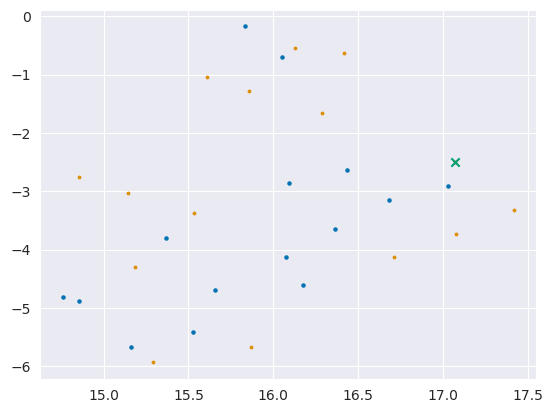

In [9]:

plt.scatter(X_t[:int(n/2), 0], X_t[:int(n/2), 1], s=5)
plt.scatter(X_t[int(n/2):n, 0], X_t[int(n/2):n, 1], s=3)
plt.scatter(X_t[-1, 0], X_t[-1, 1], marker="x")

In [10]:
reference = {}
def add_reference(title, desc):
    reference[title] = (desc, model.encode(extract_book(search(desc, n=1)[0][0])[2]))

In [11]:
add_reference("Moby Dick", "Command the murderous chalices! Drink ye harpooners! Drink and swear, ye men that man the deathful whaleboat\'s bow -- Death to Moby Dick! So Captain Ahab binds his crew to fulfil his obsession -- the destruction of the great white whale. Under his lordly but maniacal command the Pequod\'s commercial mission is perverted to one of vengeance.")
add_reference("Murderbot", "The series is about an artificial construct designed as a Security Unit, which manages to override its governor unit, thus enabling it to develop independence. It calls itself Murderbot, and likes to watch unrealistic soap operas.")
add_reference("Infinite Jest", "Set in an addicts' hallway house and a tennis academy, and featuring one of the moste endearing screwed-up families in contemporary fiction. Infinite Jest explores essential questions about what entertainment is and why it has come to dominate our livs, about how our desire for entertainment affects our need to connect with other people, and about what the pleasures we choose say about who we are.")
add_reference("Wuthering Heights", "Lockwood, the new tenant of Thrushcross Grange on the bleak Yorkshire moors, is forced to seek shelter one night at Wuthering Heights, the home of his landlord. There he discovers the history of the tempestuous events that took place years before: of the intense passion between the foundling Heathcliff and Catherine Earnshaw, and her betrayal of him.")
add_reference("The Geneva Bible", "Published in 1579, this, the Geneva Bible, was the most popular Bible in England in its time, and was used by such notable personages as John Bunyan, Shakespeare, and the Pilgrims.  Because its notes were considered offensive by the monarchy of Great Britain, it was not officially recognized by the Church of England.")
add_reference("A Brief History of Time", """Stephen W. Hawking, widely regarded as the most brilliant physicist since Einstein, discusses in a friendly and self-deprecating manner age-old questions about the origin and fate of the universe. Difficult concepts are made simple by Hawking's familiar, accessible prose.""")
add_reference("The Da Vinci Code", "Harvard professor Robert Langdon receives an urgent late-night phone call while on business in Paris: the elderly curator of the Louvre has been brutally murdered inside the museum.Alongside the body, police have found a series of baffling codes")
add_reference("The Art of War", "The original and bestselling leadership book!. Sun Tzu's ideas on survival and success have been read across the world for centuries. Today they can still be applied to business, politics and life. The Art of War demonstrates how to win without conflict. It shows that with enough intelligence and planning, it is possible to conquer with a minimum of force and little destruction.")
add_reference("The Very Hungry Caterpillar", "Follows the progress of a very hungry little caterpillar as he eats his way through a varied and very large quantity of food until, full at last, he forms a cocoon around himself and goes to sleep.")
add_reference("The Lord of the Rings", "Originally published from 1954 through 1956, J.R.R. Tolkien's richly complex series ushered in a new age of epic adventure storytelling. A philologist and illustrator who took inspiration from his work, Tolkien invented the modern heroic quest novel from the ground up, creating not just a world, but a domain, not just a lexicon, but a language, that would spawn countless imitators and lead to the inception of the epic fantasy genre.")
add_reference("Cryptonomicon", "n 1942, Lawrence Pritchard Waterhouse - mathematical genius and young Captain in the US Navy - is assigned to Detachment 2702. It is an outfit so secret that only a handful of people know it exists, and some of those people have names like Churchill and Roosevelt. The mission of Watrehouse and Detachment 2702 - commanded by Marine Raider Bobby Shaftoe - is to keep the Nazis ignorant of the fact that Allied Intelligence has cracked the enemy's fabled Enigma code.")


In [12]:
for title, (desc, vector) in reference.items():
    print(title, extract_book(search(vector, n=1)[0][0]))

Moby Dick ('Moby Dick', 'Herman Melville"', '"Command the murderous chalices! Drink ye harpooners! Drink and swear, ye men that man the deathful whaleboat\'s bow -- Death to Moby Dick!" So Captain Ahab binds his crew to fulfil his obsession -- the destruction of the great white whale. Under his lordly but maniacal command the Pequod\'s commercial mission is perverted to one of vengeance. To Ahab, the monster that destroyed his body is not a creature, but the symbol of "some unknown but still reasoning thing." Uncowed by natural disasters, ill omens, even death, Ahab urges his ship towards "the undeliverable, nameless perils of the whale." Key letters from Melville to Nathaniel Hawthorne are printed at the end of this volume. - Back cover.')
Murderbot ('All Systems Red', 'Martha Wells"', 'The series is about an artificial construct designed as a Security Unit, which manages to override its governor unit, thus enabling it to develop independence. It calls itself Murderbot, and likes to w

In [13]:
b_n = 500
random_books = np.random.choice(books, b_n)
random_vecs = model.encode([book.description for book in random_books])   


def reference_plot(query, labels=None):
    if isinstance(query, str):
        extra = [model.encode(extract_book(search(query, n=1)[0][0])[2])]
    else:
        extra = np.vstack(query)
    plt.figure(figsize=(12,9))
    A = np.vstack((random_vecs, np.array(
        [vector for (desc, vector) in reference.values()]), 
        extra
    ))
    titles = list(reference.keys())
    X_t = reducer.fit_transform(A)
    r = len(reference.keys())
    background = X_t[:b_n, :]
    X_t = X_t[b_n:, :]
    plt.scatter(background[:, 0], background[:, 1], s=1, alpha=0.5, c="SlateGrey")
    plt.scatter(X_t[:r, 0], X_t[:r, 1])
    # Add labels to each point
    for label, x, y in zip(titles, X_t[:r, 0], X_t[:r, 1]):
        plt.text(x, y, label)
    plt.scatter(X_t[r:, 0], X_t[r:, 1], c="red")
    if labels:
        for label, x, y in zip(labels, X_t[r:, 0], X_t[r:, 1]):
            plt.text(x, y, label)
    plt.show()
    plt.close()
    return X_t, background

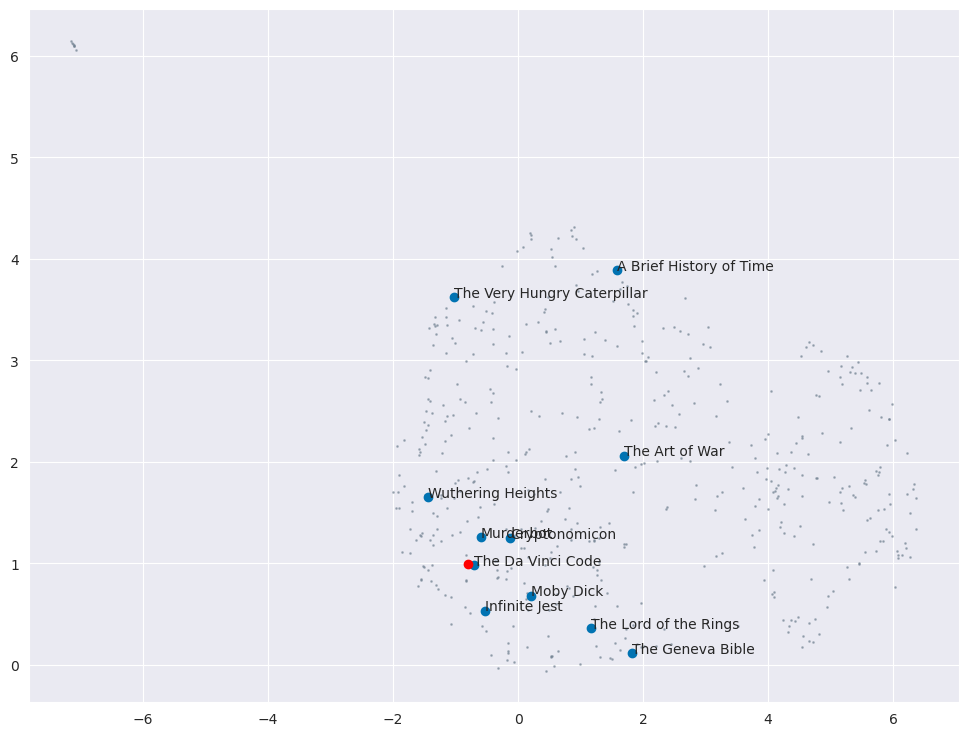

In [14]:
youtoo = "A missing-person mystery told from the point of view of the missing person; an American horror story that concerns sex and friendship, consumption and appetite, faith and transformation, real food and reality television; and ... a wholly singular view of modern womanhood"

X_t, background = reference_plot(youtoo)

## Look at neighbors of the famous books

In [15]:
[extract_book(hit) for hit in search(reference["Moby Dick"][0], n=25)[0]]

[('Moby Dick',
  'Herman Melville"',
  '"Command the murderous chalices! Drink ye harpooners! Drink and swear, ye men that man the deathful whaleboat\'s bow -- Death to Moby Dick!" So Captain Ahab binds his crew to fulfil his obsession -- the destruction of the great white whale. Under his lordly but maniacal command the Pequod\'s commercial mission is perverted to one of vengeance. To Ahab, the monster that destroyed his body is not a creature, but the symbol of "some unknown but still reasoning thing." Uncowed by natural disasters, ill omens, even death, Ahab urges his ship towards "the undeliverable, nameless perils of the whale." Key letters from Melville to Nathaniel Hawthorne are printed at the end of this volume. - Back cover.'),
 ('Moby Dick, or The White Whale',
  'Geraldine McCaughrean"',
  'A young seaman joins the crew of the whaling ship Pequod, led by the fanatical Captain Ahab in pursuit of the white whale Moby Dick.'),
 ('Moby Dick, or The white whale',
  'Geraldine McC

In [16]:
[extract_book(hit) for hit in search(reference["A Brief History of Time"][0], n=25)[0]]

[('A brief history of time',
  'Stephen Hawking"',
  "Stephen W. Hawking, widely regarded as the most brilliant physicist since Einstein, discusses in a friendly and self-deprecating manner age-old questions about the origin and fate of the universe. Difficult concepts are made simple by Hawking's familiar, accessible prose."),
 ('The universe in a nutshell',
  'Stephen Hawking"',
  '"One of the most influential thinkers of our time, Stephen Hawking is an intellectual icon, known not only for the adventurousness of his ideas but for the clarity and wit with which he expresses them. In this new book Hawking takes us to the cutting edge of theoretical physics, where truth is often stranger than fiction, to explain in laymen\'s terms the principles that control our universe.".  "The Universe in a Nutshell is essential reading for all of us who want to understand the universe in which we live. Like its companion volume, A Brief History of Time, it conveys the excitement felt within the sci

In [17]:
[extract_book(hit) for hit in search(reference["Infinite Jest"][0], n=25)[0]]

[('Infinite Jest',
  'David Foster Wallace"',
  "Set in an addicts' hallway house and a tennis academy, and featuring one of the moste endearing screwed-up families in contemporary fiction. Infinite Jest explores essential questions about what entertainment is and why it has come to dominate our livs, about how our desire for entertainment affects our need to connect with other people, and about what the pleasures we choose say about who we are.\r \r Equal parts philisophical quest and screwball comedy, Infinite Jest bends every rule of fiction without sacrificing for a moment its own entertainment value. It is an exuberant, uniquely American exploration of the passions that make us human - and one of those rare books that renew the idea of what a novel can do.\r (back cover)"),
 ('Infinite jest',
  'David Foster Wallace"',
  "A gargantuan, mind-altering comedy about the Pursuit of Happiness in America Set in an addicts' halfway house and a tennis academy, and featuring the most endear

## Try to connect two books

 34%|████████████████████████████████████████████████████                                                                                                     | 17/50 [00:16<00:35,  1.07s/it]

4275 

 34%|████████████████████████████████████████████████████                                                                                                     | 17/50 [00:27<00:52,  1.59s/it]IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)




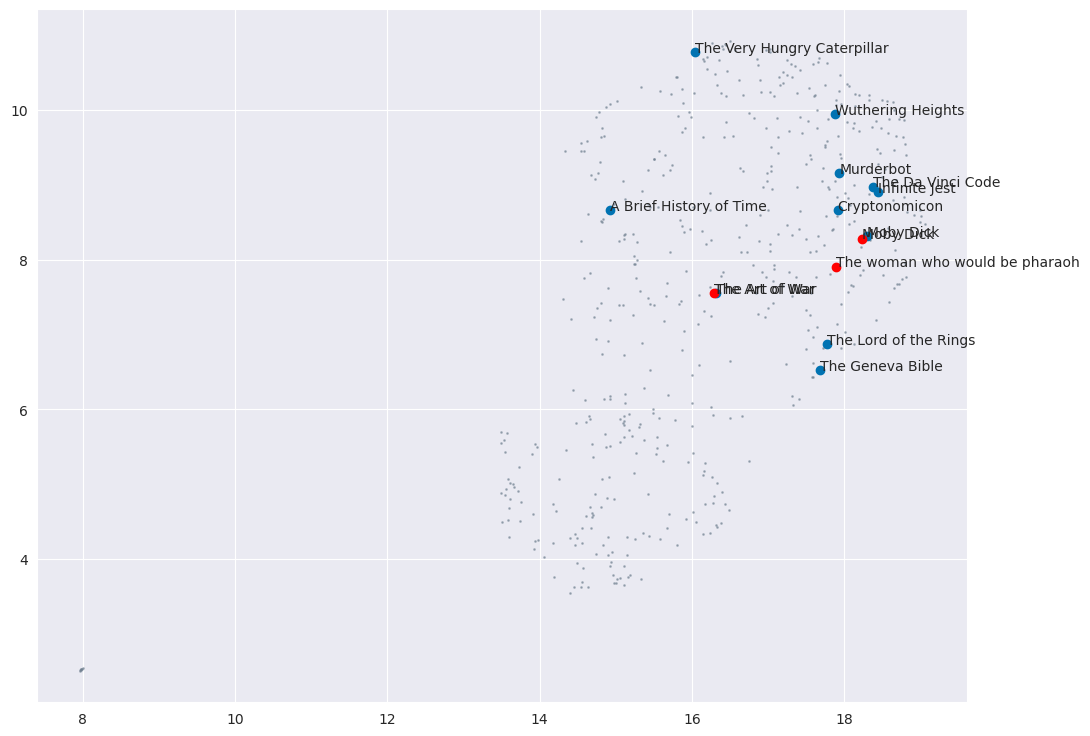

In [18]:
fromb = "Moby Dick"
tob = "The Art of War"
for n in trange(25, 12500, 250, position=0, leave=True):
    resultsa = search(reference[fromb][0], n=n)
    resultsb = search(reference[tob][0], n=n)
    idsa = [hit.entity.get("title_id") for hit in resultsa[0]]
    idsb = [hit.entity.get("title_id") for hit in resultsb[0]]
    common = set(idsa).intersection(set(idsb))
    if common:
        booksc = [extract_book(hit) for hit in resultsa[0] if hit.entity.get("title_id") in common]
        print(n, books)
        break

_ = reference_plot([reference[fromb][1],
                reference[tob][1],
                model.encode([booksc[0][2]])[0]],
              labels=[fromb, tob, booksc[0][0]])

## Let's do some Topological Data Analysis

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:54<00:00, 91.56it/s]


Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


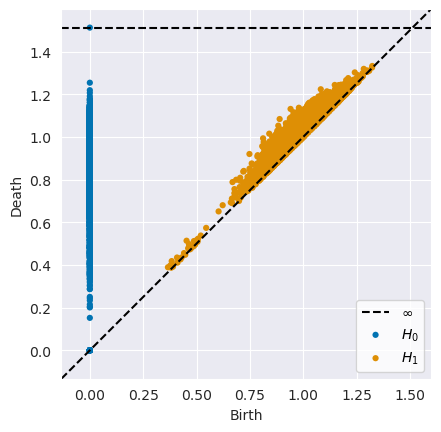

In [19]:
from ripser import Rips
r = 5000
random_booksa = np.random.choice(books, r, replace=False)
random_vecsa = np.vstack([model.encode(book.description) for book in tqdm(random_booksa, position=0, leave=True)])  
rips = Rips()
diagrams = rips.fit_transform(random_vecsa)
rips.plot(diagrams)

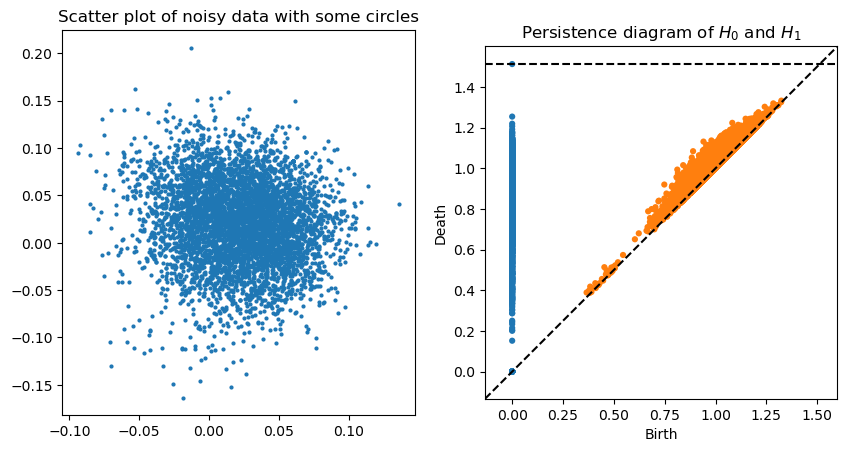

In [20]:
H0_dgm = diagrams[0]
H1_dgm = diagrams[1]

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(random_vecsa[:,0], random_vecsa[:,1], s=4)
plt.title("Scatter plot of noisy data with some circles")

plt.subplot(122)
rips.plot(diagrams, legend=False, show=False)
plt.title("Persistence diagram of $H_0$ and $H_1$")
plt.show()

In [21]:
random_vecsa.shape

(5000, 768)

In [22]:
refa = "Moby Dick"
refb = "Wuthering Heights"
veca = reference[refa][1]
vecb = reference[refb][1]
vector = vecb - veca
vector = vector / np.sqrt(np.sum(vector**2))

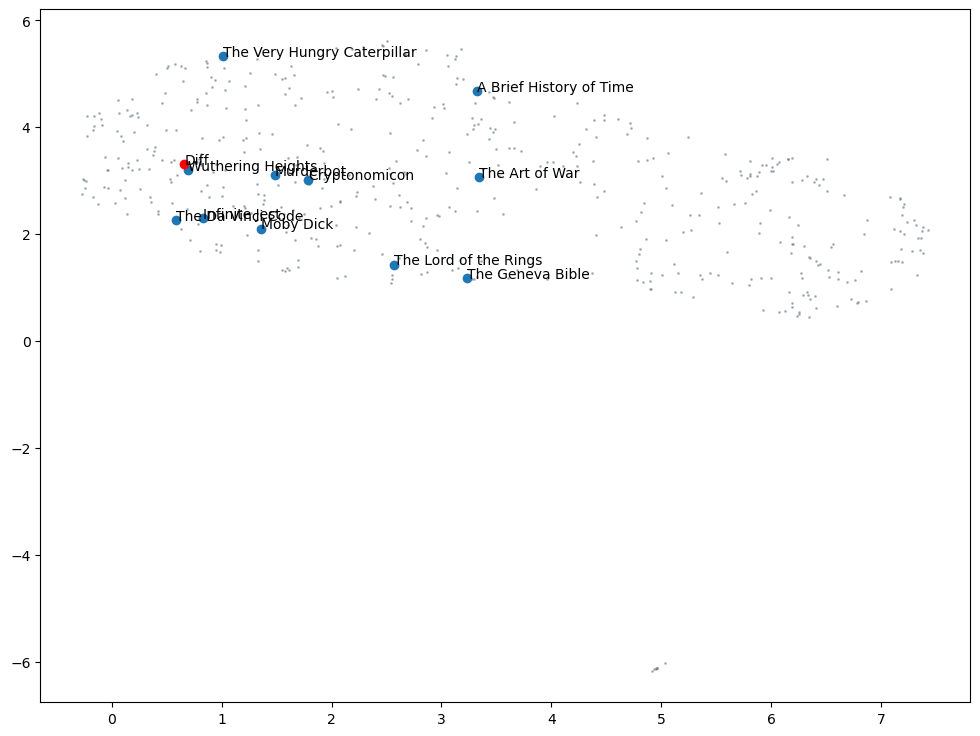

In [23]:
_ = reference_plot([vector], labels=["Diff"])

In [24]:
order = np.argsort(random_vecsa.min(axis=0))

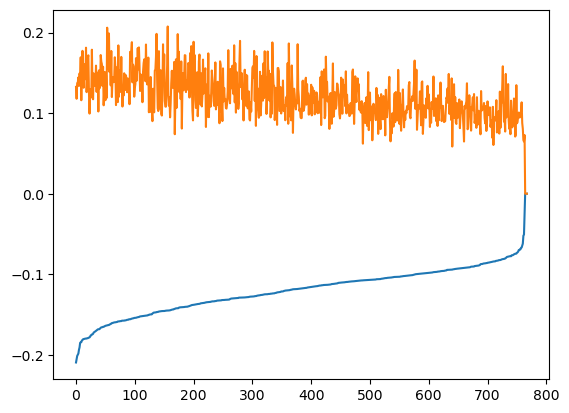

In [25]:
plt.plot(np.arange(random_vecsa.shape[1]), random_vecsa.min(axis=0)[order], np.arange(random_vecsa.shape[1]), random_vecsa.max(axis=0)[order])

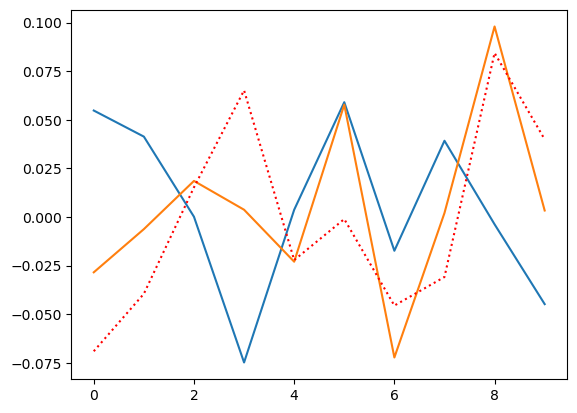

In [26]:
plt.plot(np.arange(10), veca[:10], np.arange(10), vecb[:10])
plt.plot(range(10), vector[:10], "r:")

## Check all 768 dimensions are independent

(array([3.00000e+00, 6.40000e+01, 6.38700e+03, 1.12195e+05, 4.52812e+05,
        1.73670e+04, 2.22000e+02, 3.00000e+00, 2.00000e+00, 7.69000e+02]),
 array([-0.70706287, -0.53635659, -0.3656503 , -0.19494401, -0.02423772,
         0.14646856,  0.31717485,  0.48788114,  0.65858743,  0.82929371,
         1.        ]),
 <BarContainer object of 10 artists>)

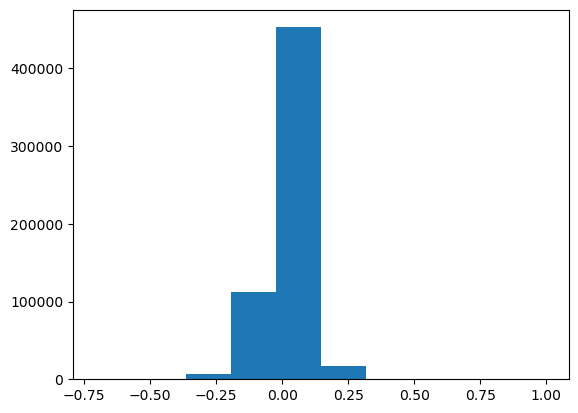

In [27]:
C = np.triu(np.corrcoef(random_vecsa, rowvar=False))
plt.hist(C.ravel().squeeze())

In [28]:
C.ravel().squeeze().shape

(589824,)

## Random Projections into lower dimensional subspaces

In [29]:

johnson_lindenstrauss_min_dim(r, eps=[0.01, 0.1, 0.5, 0.9, 0.99, 0.999])

array([685948,   7300,    408,    210,    204,    204])

In [30]:
transformer = SparseRandomProjection(eps=0.95)
X_sp = transformer.fit_transform(random_vecsa)
X_sp.shape

(5000, 205)

In [31]:
random_vecsa.shape

(5000, 768)

In [47]:
set([extract_book(hit) for hit in search("This novel and critique of modern life, struggle to be the best and competition", n=25)[0]])

{('Adhura Safar',
  'Tirthraj Sharma"',
  'Novel On basis of struggle; a man who is on square of road; puzzled; to try to succeed.'),
 ('Barracuda',
  'Christos Tsiolkas"',
  "Contemporary fiction. Daniel Kelly, a talented young swimmer, has one chance to escape his working-class upbringing. His astonishing ability in the pool should drive him to fame and fortune, as well as his revenge on the rich boys at the private school to which he has won a sports scholarship. But when he melts down at his first big international championship and comes only fifth, he begins to destroy everything he has fought for and turn on everyone around him. 'Barracuda' is a powerful and moving novel of sport and violence, class and education, dreams and disillusionment; it is the story of a young man who eventually comes to realise that it is in family and friendship that his strongest identity lies."),
 ('Dealing with competitiveness',
  'Don Middleton"',
  'Explains competition, its importance, and how to 